##Script Seminario-Monografía##





**Nombres Completos**: Andres Julian Espinal Benjumea

**Número de Cédula**: 1128439656


**Stroke Prediction Dataset**

Según la OMS para el año 2019 la cardiopatía istemica es la mayor causa de muertes del mundo representada por un 16% del total de defunciones, esta es seguida por los accidentes cerebrovasculares (Stroke) con un 11% y la  enfermedad pulmonar obstructiva crónica con un 6%.

Es en este segundo lugar que se va a concentrar el análisis de este trabajo con el fin de conocer la relación de los accidentes cerebro vasculares con una base de datos proporcionada en kaggle, la cual enmarca ciertas categorías tanto numéricas, binarias como categóricas.

La base de datos se puede encontrar en kaggle en el siguiente vínculo:

[Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

Para conocer un poco como está distribuida la base de datos se hará un recorrido por cada uno de las columnas que esta posee:

•	id: Se refiere a un código único que tiene cada paciente. (Numérica)

•	gender: Aquí se encuentran 3 géneros los cuales son "Male", "Female" y "Other". (Categórica)

•	age: Hace referencia a la edad del paciente. (Numérica)

•	hypertension: La base de datos clasifica con 0 si el paciente no tiene hipertensión y con 1 si el paciente sufre hipertensión. (Numérica)

•	heart_disease: En esta variable se clasifica con 0 si el paciente no tiene ninguna enfermedad cardíaca y con 1 si el paciente padece una enfermedad cardíaca. (Numérica)

•	ever_married: Esta variable explica si el paciente está casado con "Yes" y con "No" si no lo está.  (Categórica)

•	work_type: Se divide en si trabajó con niños como "children", si obtuvo un trabajo en el gobierno "Govt_jov", si nunca trabajó "Never_worked", si trabajó en el sector privado "Private" o por el contrario trabajó como independiente "Self-employed". (Categórica)

•	Residence_type: Se divide en si la zona de residencia es rural "Rural" o urbana "Urban". (Categórica)

•	avg_glucose_level: Dato numérico que mide el nivel promedio de glucosa en sangre. (Numérica)

•	bmi: Dato numérico que muestra el índice de masa corporal. (Numérica)

•	smoking_status: Columna que especifica si el paciente ya había fumado anteriormente "formerly smoked",  si nunca fumó "never smoked", si en la actualidad fumaba "smokes" o si la información no está disponible para el paciente como "Unknown". (Categórica)

•	stroke: Es la variable respuesta y nos indica con 1 si el paciente tuvo un accidente cerebrovascular o con 0 si no lo tuvo. (Numérica)

La base de datos cuenta con 12 columnas y 5.110 filas.



##**Abrir desde el drive/kaggle**

Para usar el código desde kaggle se debe utilizar un API token generado por su perfil de Kaggle para descargar la base de datos directamente desde el sitio web. Deben almacenar el token dentro de su espacio en Google Drive.
En la dirección web donde se encuentra el proyecto [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset), se deben registrar y luego deben ir a su perfil que es el logo o foto que usas en el costado derecho en la parte de arriba de la pantalla y allí debes ir a settings y luego buscar el botón Create New Token, este se descargará y como se dijo anteriormente deben almacenarlo en su drive.


In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


No es necesario poner nada, solo darle enter cuando salga el espacio para escribir.

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/' + input('Input the directory with your Kaggle json file: ') # Dejar input vacío en caso de que el archivo se encuentre en la raíz de Drive
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset # Descarga del archivo comprimido
!unzip \*.zip && rm *.zip # Descomprensión y eliminación de cualquier archivo .zip

Input the directory with your Kaggle json file: 
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 60.5MB/s]
Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


##**Abrir desde el GitHub**

Solo es necesario correr este código de abajo y luego en la parte de cargue de datos hacerlo en el que dice **Cargue de datos desde GitHub**.

In [ ]:
!git clone https://github.com/AndresEspinal/monografia-stroke.git

fatal: destination path 'monografia-stroke' already exists and is not an empty directory.


##**Abrir desde el Jupyter**

Para abrirlo desde Jupyter solo hace falta descargar o ubicar el script en el pc y buscar en la carpeta que fue creado, allí solo debemos poner la base de datos que esta localizada en el [GitHub](https://github.com/AndresEspinal/monografia-stroke) en la carpeta BD y luego descargarla. Cuando este descargada es necesario ubicar la base de datos en la misma carpeta del script.
Sigue los pasos normales y en la parte de cargue de datos debes hacerlo desde **Cargue de datos desde el drive/kaggle/Jupyter**

Cargue de librerías y funciones

In [ ]:
import pandas as pd
import io
import requests
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.random_projection import johnson_lindenstrauss_min_dim, GaussianRandomProjection, SparseRandomProjection
from sklearn.decomposition import PCA # Análisis de Componentes Principales
from sklearn.decomposition import KernelPCA # Kernel PCA
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances
from sklearn.tree import plot_tree


from imblearn.over_sampling import RandomOverSampler

from scipy.special import entr
from scipy import special
from scipy.stats import spearmanr
from scipy.spatial.distance import euclidean

from collections import defaultdict

from yellowbrick.cluster import KElbowVisualizer # Visualizador del diagrama del codo

#from validclust.indices import dunn # Método de validación Dunn
#from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality


In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Análisis Exploratorio

**Cargue de datos desde el drive/kaggle/Jupyter**

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Cargue de datos desde GitHub**

In [ ]:
df = pd.read_csv("/content/monografia-stroke/BD/healthcare-dataset-stroke-data.csv")

In [ ]:
#Análisis de cada columna como está configurada y sus datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#Columnas
oldvariables = df.columns
oldvariables

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#Datos faltantes
for i in oldvariables:
    print('Para la variable',i,'se tiene un total de',df[i].isnull().sum(),'datos nulos',', esto representa un',round(100*df[i].isnull().sum()/df.shape[0],2),"% respecto al total de datos")

Para la variable id se tiene un total de 0 datos nulos , esto representa un 0.0 % respecto al total de datos
Para la variable gender se tiene un total de 0 datos nulos , esto representa un 0.0 % respecto al total de datos
Para la variable age se tiene un total de 0 datos nulos , esto representa un 0.0 % respecto al total de datos
Para la variable hypertension se tiene un total de 0 datos nulos , esto representa un 0.0 % respecto al total de datos
Para la variable heart_disease se tiene un total de 0 datos nulos , esto representa un 0.0 % respecto al total de datos
Para la variable ever_married se tiene un total de 0 datos nulos , esto representa un 0.0 % respecto al total de datos
Para la variable work_type se tiene un total de 0 datos nulos , esto representa un 0.0 % respecto al total de datos
Para la variable Residence_type se tiene un total de 0 datos nulos , esto representa un 0.0 % respecto al total de datos
Para la variable avg_glucose_level se tiene un total de 0 datos nulos , e

Se evidencia que la única columna con datos faltantes es bmi y estos solo representan el 3.93%, al ser una baja cantidad de datos faltantes se puede realizar una imputación de datos simple sin generar redundancia.

In [ ]:
#Se elimina la columna ID ya que no aporta nada a la base de datos por ser datos únicos
df=df.drop(['id'], axis=1)

In [ ]:
#Verificación de datos duplicados
df.loc[df.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Se puede evidenciar que no se encuentran registros duplicados.

In [ ]:
variables=df.columns
variables

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
l=["age",'avg_glucose_level', 'bmi']
grafica=variables.drop(l)
grafica

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#Se crea la figura para visualizar el desbalance de la variable salida
plt.figure(figsize=(6,4))

plt.title('Gráfica de frecuencia de stroke')
sns.countplot(x=datos_limpios["stroke"])


plt.show()

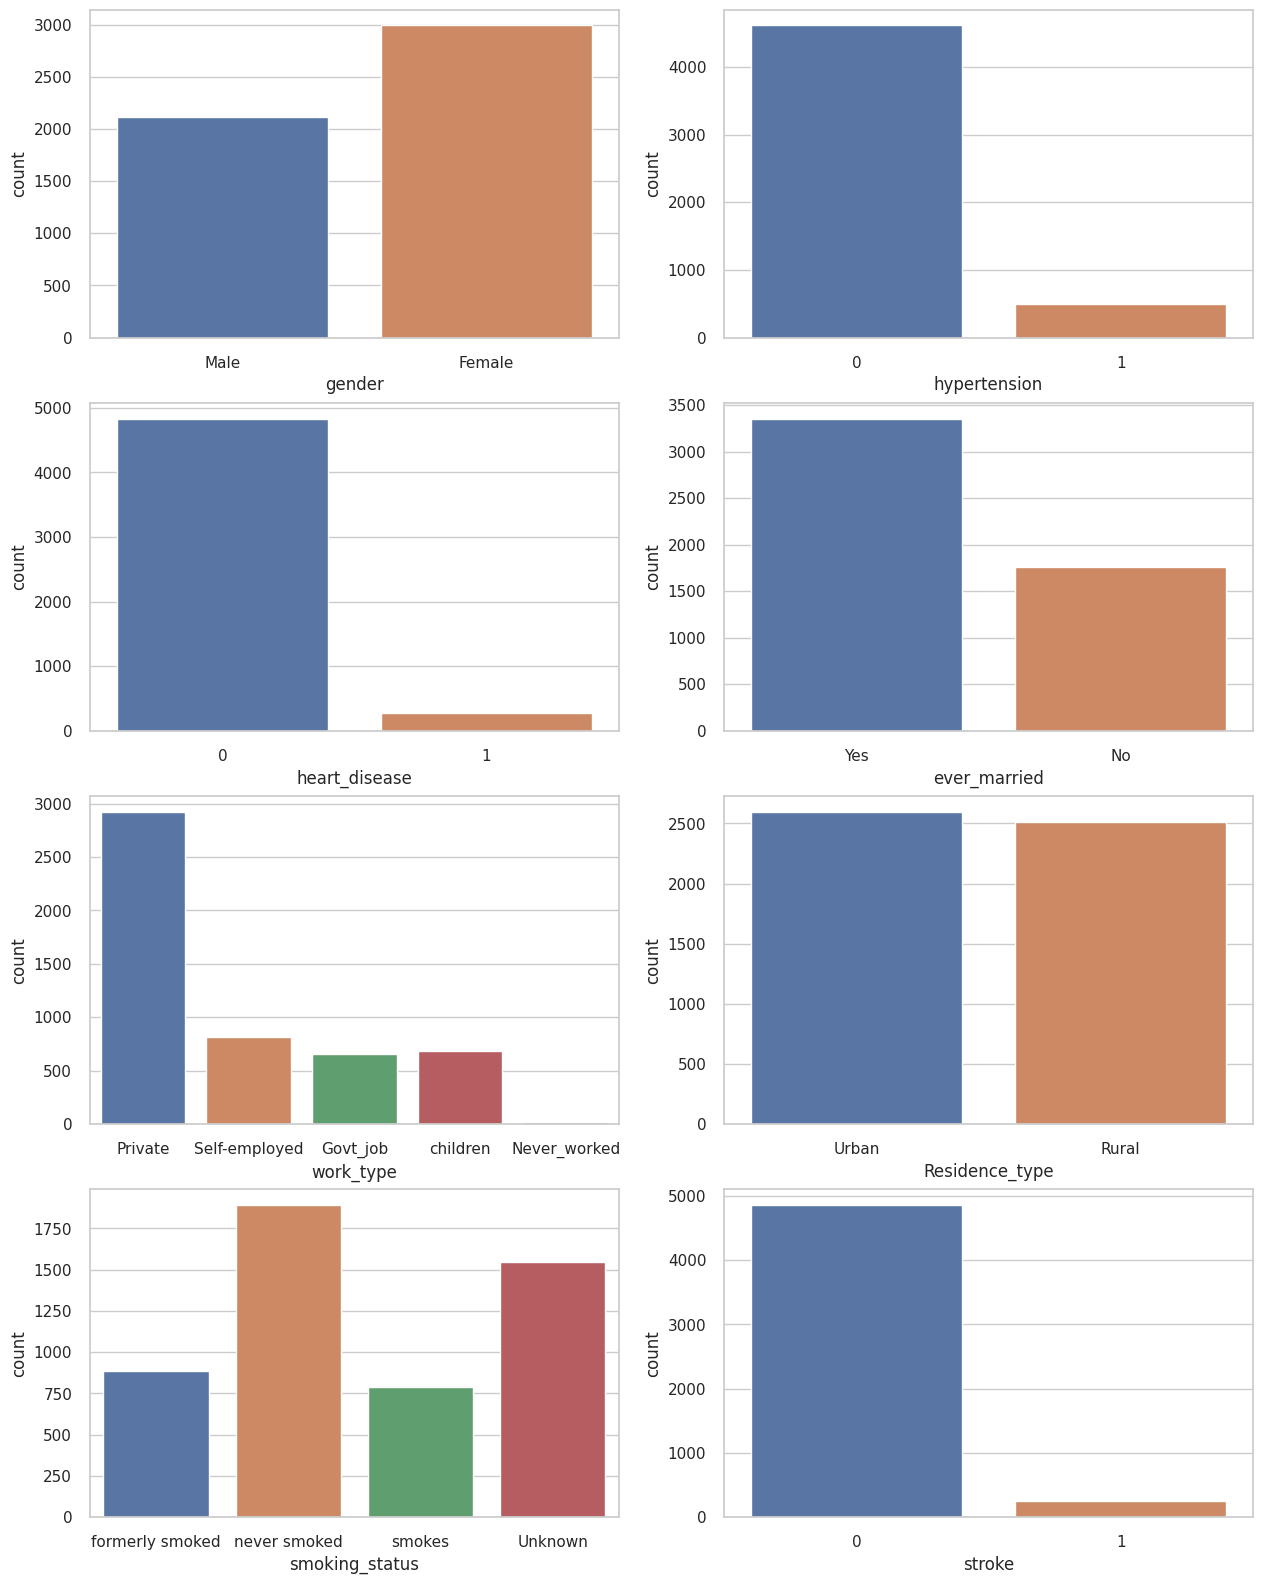

In [ ]:
#Distrubución de las variables
fig = plt.figure(figsize=(15, 40))

for i in range (len(grafica)):
    plt.subplot(8, 2, i+1)

    sns.countplot(data=df,x=grafica[i])

In [ ]:
#Separamos valores cualitativos y cuantitativos

cuantitativos=[]
cualitativos=[]
for i in variables:
    if type(df[i][0])==str:
        cualitativos.append(i)
    else:
        cuantitativos.append(i)

In [ ]:
#En busca de calidad en los datos
for i in variables:
    print(i.capitalize(), "\n", df[i].value_counts(), "\n", "\n")

Gender 
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 
 

Age 
 78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64 
 

Hypertension 
 0    4612
1     498
Name: hypertension, dtype: int64 
 

Heart_disease 
 0    4834
1     276
Name: heart_disease, dtype: int64 
 

Ever_married 
 Yes    3353
No     1757
Name: ever_married, dtype: int64 
 

Work_type 
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 
 

Residence_type 
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 
 

Avg_glucose_level 
 93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64 
 

Bmi 
 28.7    41
28.4    38
26.7    37
27.6    37
26.1 

En general se evidencia una buena calidad de datos en las variables de la base de datos. En la variable gender se observa un solo registro en la categoría otros, la cual al ser solo 1 se decide retirar de la base de datos ya que no será posible encontrar tendencias para esta sola categoría.

In [ ]:
#Se elimina la categoría other en la columna gender
df=df.drop(df[df["gender"]=="Other"].index[0],axis=0)
df


for i in variables:
    print(i.capitalize(), "\n", df[i].value_counts(), "\n", "\n")

Gender 
 Female    2994
Male      2115
Name: gender, dtype: int64 
 

Age 
 78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64 
 

Hypertension 
 0    4611
1     498
Name: hypertension, dtype: int64 
 

Heart_disease 
 0    4833
1     276
Name: heart_disease, dtype: int64 
 

Ever_married 
 Yes    3353
No     1756
Name: ever_married, dtype: int64 
 

Work_type 
 Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 
 

Residence_type 
 Urban    2596
Rural    2513
Name: Residence_type, dtype: int64 
 

Avg_glucose_level 
 93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
94.07     1
111.93    1
94.40     1
95.57     1
85.28     1
Name: avg_glucose_level, Length: 3978, dtype: int64 
 

Bmi 
 28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        .

In [ ]:
#Se resetea la base de datos ya que se eliminó others de gender
df=df.reset_index()

In [ ]:
# Se reestablecen los indices ya que se eliminaron algunas variables.
df=df.drop("index",axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5105,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#Valores cuantitativos
df_cuantitativos=pd.DataFrame()
for i in cuantitativos:
    df_cuantitativos[i]=df[i]

df_cuantitativos

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5104,80.0,1,0,83.75,NaN,0
5105,81.0,0,0,125.20,40.0,0
5106,35.0,0,0,82.99,30.6,0
5107,51.0,0,0,166.29,25.6,0


In [ ]:
#Valores cualitativos
df_cualitativos=pd.DataFrame()
for i in cualitativos:
    df_cualitativos[i]=df[i]

df_cualitativos

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5104,Female,Yes,Private,Urban,never smoked
5105,Female,Yes,Self-employed,Urban,never smoked
5106,Female,Yes,Self-employed,Rural,never smoked
5107,Male,Yes,Private,Rural,formerly smoked


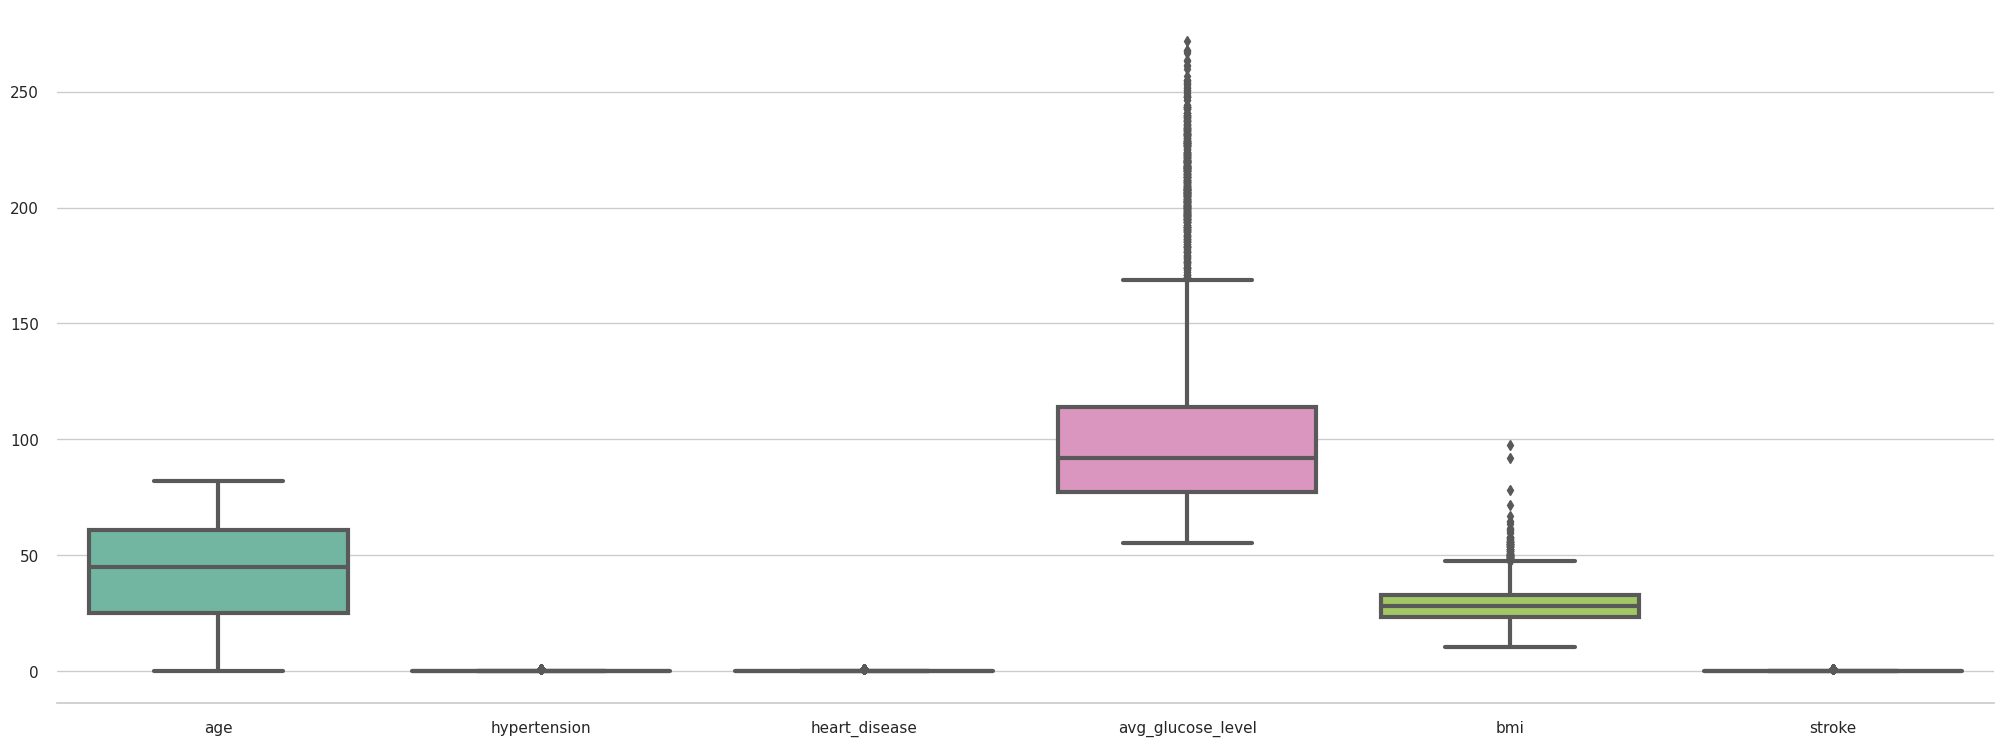

In [ ]:
#Box plot
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = df_cuantitativos, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

Como las escalas de las diferentes variables son diferentes se pueden presentar distorsiones en el gráfico de los diagramas de cajas, por lo que se decide revisar estos gráficos de forma individual.

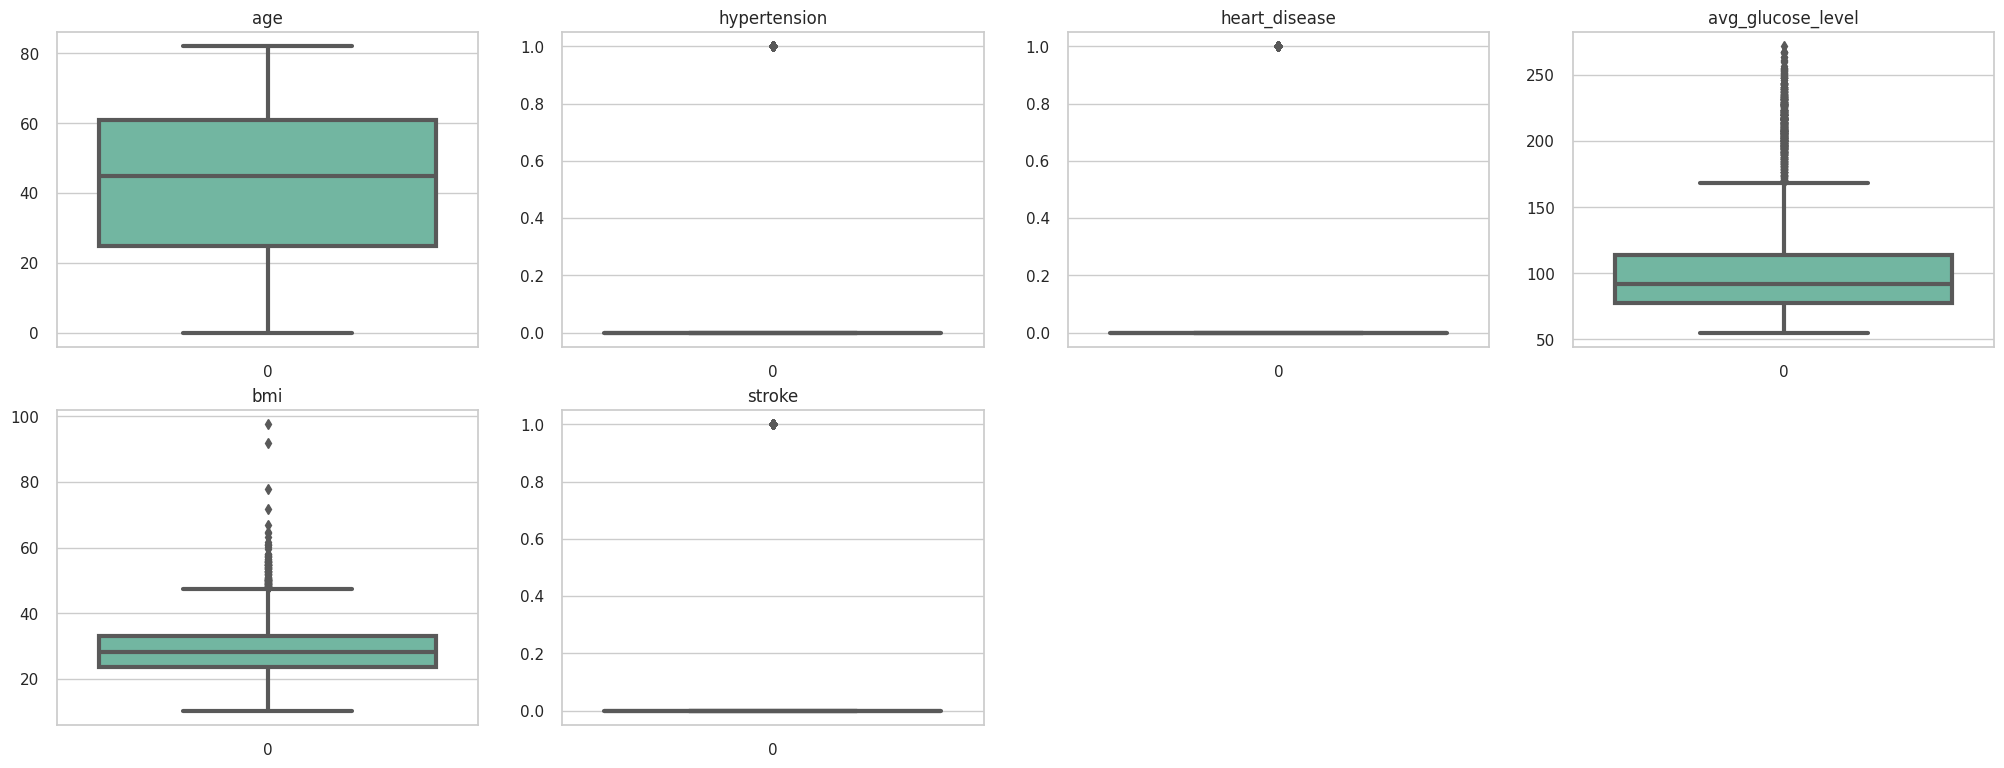

In [ ]:
#Independizamos cada boxplot en su propia escala
for i in range (len(cuantitativos)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data = df[cuantitativos[i]], linewidth = 3, palette="Set2", fliersize = 5)
    plt.title(cuantitativos[i])

Se evidencia una cantidad importante de datos atipicos en el nivel de glucosa y en menor medida en bmi. Mientras que en las variables hipertension, infarto y derrame presentan una gran cantidad de datos en cero y solo unos cuantos puntos en 1.


Se realiza imputación de datos para la variable BMI utilizando la mediana debido a la presencia de datos atipicos.

In [ ]:
#Imputación por la mediana: Otorga valores parecidos a los valores de BMI
imp_2 = SimpleImputer(missing_values = np.nan, strategy= 'median')
imp_2.fit(df_cuantitativos)
Datos_Imputacion_Mediana = imp_2.transform(df_cuantitativos)
nombres = df_cuantitativos.columns
Datos_Imputacion_Mediana = pd.DataFrame(Datos_Imputacion_Mediana, columns = cuantitativos)
display(Datos_Imputacion_Mediana)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0.0,1.0,228.69,36.6,1.0
1,61.0,0.0,0.0,202.21,28.1,1.0
2,80.0,0.0,1.0,105.92,32.5,1.0
3,49.0,0.0,0.0,171.23,34.4,1.0
4,79.0,1.0,0.0,174.12,24.0,1.0
...,...,...,...,...,...,...
5104,80.0,1.0,0.0,83.75,28.1,0.0
5105,81.0,0.0,0.0,125.20,40.0,0.0
5106,35.0,0.0,0.0,82.99,30.6,0.0
5107,51.0,0.0,0.0,166.29,25.6,0.0


In [ ]:
#Comprobamos que no quedan datos nulos
Datos_Imputacion_Mediana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5109 non-null   float64
 1   hypertension       5109 non-null   float64
 2   heart_disease      5109 non-null   float64
 3   avg_glucose_level  5109 non-null   float64
 4   bmi                5109 non-null   float64
 5   stroke             5109 non-null   float64
dtypes: float64(6)
memory usage: 239.6 KB


In [ ]:
#Separamos variables cuantitativas tanto binarias como las que no interesan
binarias=["hypertension",	"heart_disease",	"stroke"]
num = ["age", "avg_glucose_level", "bmi"]

num = ["age", "avg_glucose_level", "bmi"]
numm=pd.DataFrame()
for i in num:
    numm=numm.append(Datos_Imputacion_Mediana[i])
numm=numm.T
numm


<ipython-input-26-98d92aeaa7c9>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numm=numm.append(Datos_Imputacion_Mediana[i])
<ipython-input-26-98d92aeaa7c9>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numm=numm.append(Datos_Imputacion_Mediana[i])
<ipython-input-26-98d92aeaa7c9>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numm=numm.append(Datos_Imputacion_Mediana[i])


,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,28.1
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
...,...,...,...
5104,80.0,83.75,28.1
5105,81.0,125.20,40.0
5106,35.0,82.99,30.6
5107,51.0,166.29,25.6


**Escalar Datos**

In [ ]:
#Para usar el LOF de forma adecuada los datos deben ser escalados

MinMax = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1
nombres = numm.columns
imputados_Min_Max = MinMax.fit_transform(numm) # Transformación de los nuevos datos con una escala MinMax
imputados_Min_Max = pd.DataFrame(imputados_Min_Max, columns = num)

imputados_Min_Max

,age,avg_glucose_level,bmi
0,0.816895,0.801265,0.301260
1,0.743652,0.679023,0.203895
2,0.975586,0.234512,0.254296
3,0.597168,0.536008,0.276060
4,0.963379,0.549349,0.156930
...,...,...,...
5104,0.975586,0.132167,0.203895
5105,0.987793,0.323516,0.340206
5106,0.426270,0.128658,0.232532
5107,0.621582,0.513203,0.175258


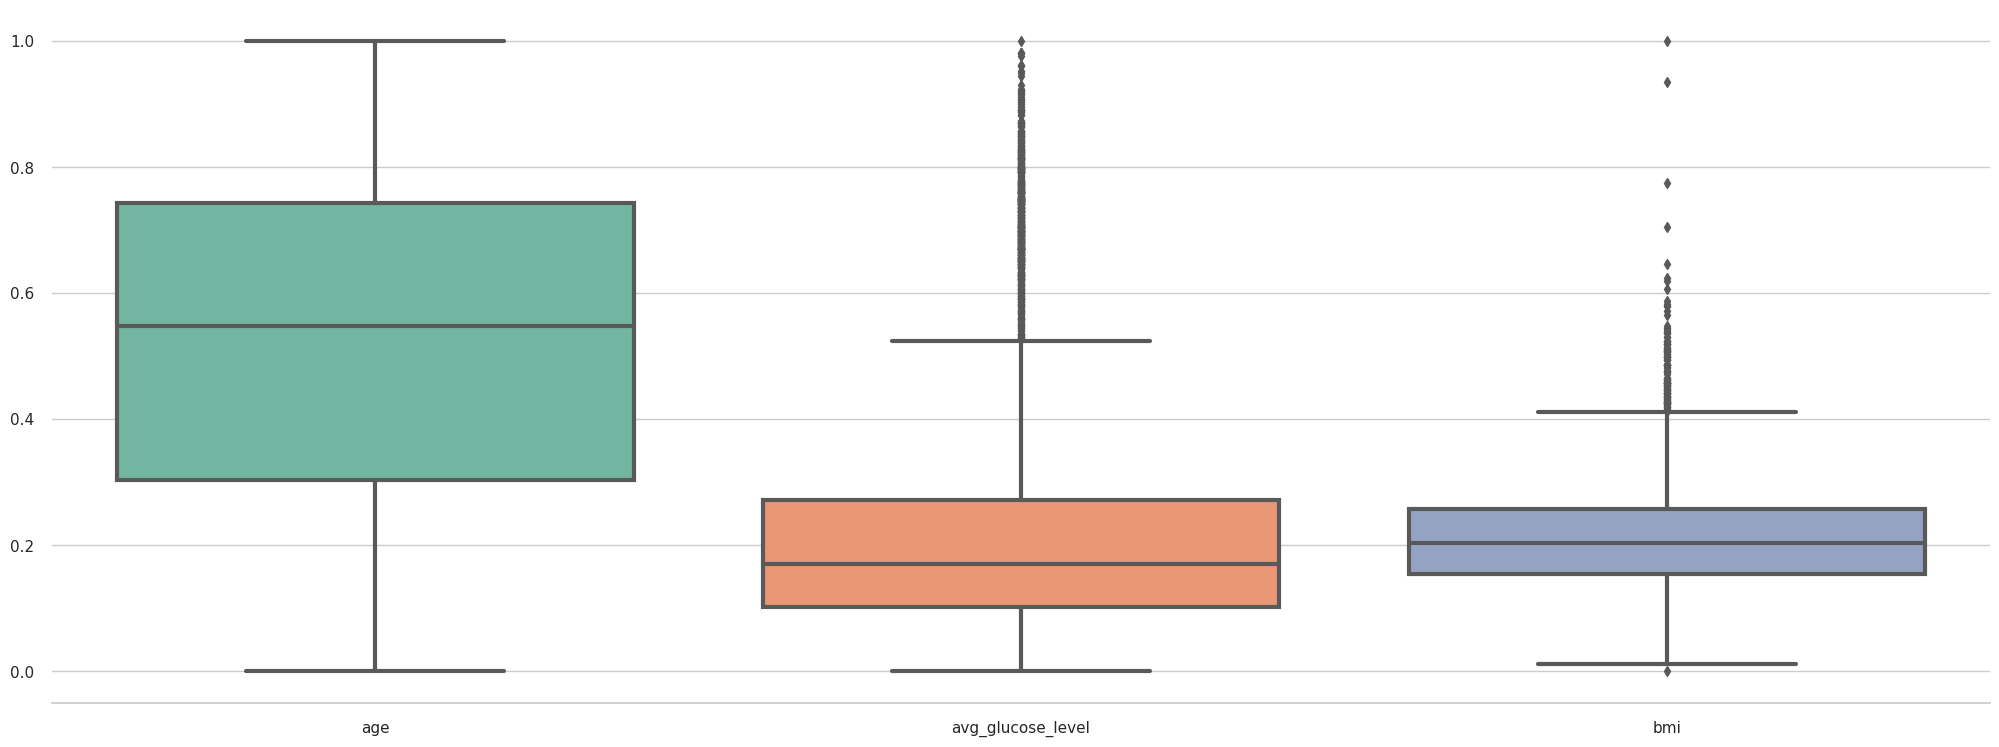

In [ ]:
#Graficamos los datos escalados para observar su distrubución
sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.boxplot(data = imputados_Min_Max, linewidth = 3, palette="Set2", fliersize = 5)
sns.despine(left=True)

In [ ]:
#Se hace una revisión de los datos numéricos para comprobar que fueron bien escalados
imputados_Min_Max.describe()

,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,5109.000000
mean,0.526733,0.235529,0.212638
std,0.276045,0.209053,0.088199
min,0.000000,0.000000,0.000000
25%,0.304199,0.102114,0.154639
50%,0.548340,0.169698,0.203895
75%,0.743652,0.272228,0.257732
max,1.000000,1.000000,1.000000


**Eliminación de datos atípicos: Método LOF**

In [ ]:
#Se identifican las posiciones de los datos atípicos
LOF = LocalOutlierFactor(n_neighbors = 5, algorithm = 'auto', contamination = 'auto', metric = 'euclidean')
# OJO, usar un número de vecinos más cercano con números impares.

Filtrado = LOF.fit_predict(imputados_Min_Max) # Se realiza la predicción de los datos atípicos

NOF = LOF.negative_outlier_factor_ # Detecta los valores positivos y negativos (residuos). Si los valores son grandes, entonces son valores no atípicos y por lo general, son valores cercanos a -1.
                                   # Si los valores son positivos y grandes y cercanos a 1, entonces son valores atípicos. La opción negative_outlier_dactor_ calcula dichos valores por
                                   # la media de la relación entre la densidad local de una muestra y las de sus vecinos más cercanos.

radio_outiler = (NOF.max() - NOF)/(NOF.max() - NOF.min()) # radio de detección de datos atípicos
ground_truth = np.ones(len(imputados_Min_Max), dtype = int)
# Se recomienda para luego comparar que datos es o no atípico (genera un vector de 1 o -1)
n_errors = (Filtrado != ground_truth).sum() # número de datos atípicos

In [ ]:
print("Detección: ", Filtrado)
print("Factores atípicos negativos: ", NOF)
print("Número de muestras o filas con datos atípicos: ", n_errors)

Detección:  [1 1 1 ... 1 1 1]
Factores atípicos negativos:  [-0.98954002 -0.97922108 -1.22488312 ... -1.14273497 -0.92009948
 -1.06536116]
Número de muestras o filas con datos atípicos:  55


In [ ]:
#Porcentaje de datos atípicos
porcentajeatipicos= 100*n_errors/numm.shape[0]
porcentajeatipicos
print(f"El porcentaje de datos atípicos es de {(round(porcentajeatipicos,3))} %")

El porcentaje de datos atípicos es de 1.077 %


Se encuentran 55 registros atípicos equivalentes a 1.07% de los registros, al ser pocos se eliminan estos datos de la base de datos. Estos datos se retiran de la base de datos original que contiene todas las variables para evitar que se desordenen los registros.

In [ ]:
#Base de datos imputada
df_imp_comp=pd.DataFrame()
for i in cuantitativos:
    df_imp_comp[i]=Datos_Imputacion_Mediana[i]
for i in cualitativos:
    df_imp_comp[i]=df_cualitativos[i]

df_imp_comp=df_imp_comp[variables]
df_imp_comp

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
1,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1.0
2,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
3,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0
4,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1.0,0.0,Yes,Private,Urban,83.75,28.1,never smoked,0.0
5105,Female,81.0,0.0,0.0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0.0
5106,Female,35.0,0.0,0.0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0.0
5107,Male,51.0,0.0,0.0,Yes,Private,Rural,166.29,25.6,formerly smoked,0.0


In [ ]:
#Se eliminan los datos atípicos
pos = np.where(Filtrado == ground_truth) # Se identifican en que muestras o filas de nuestra base de datos hay presencia de datos atípicos
pos = np.asarray(pos)
pos = np.hstack(pos)
df_sin_outliers_LOF = imputados_Min_Max.loc[pos, :]
df_sin_outliers_sin_normalizar = df_imp_comp.loc[pos, :]

print("Número de muestras sin outliers:", df_sin_outliers_LOF.shape[0])
display(df_sin_outliers_sin_normalizar)

Número de muestras sin outliers: 5054


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
1,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1.0
2,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
3,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0
4,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5103,Female,13.0,0.0,0.0,No,children,Rural,103.08,18.6,Unknown,0.0
5104,Female,80.0,1.0,0.0,Yes,Private,Urban,83.75,28.1,never smoked,0.0
5106,Female,35.0,0.0,0.0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0.0
5107,Male,51.0,0.0,0.0,Yes,Private,Rural,166.29,25.6,formerly smoked,0.0


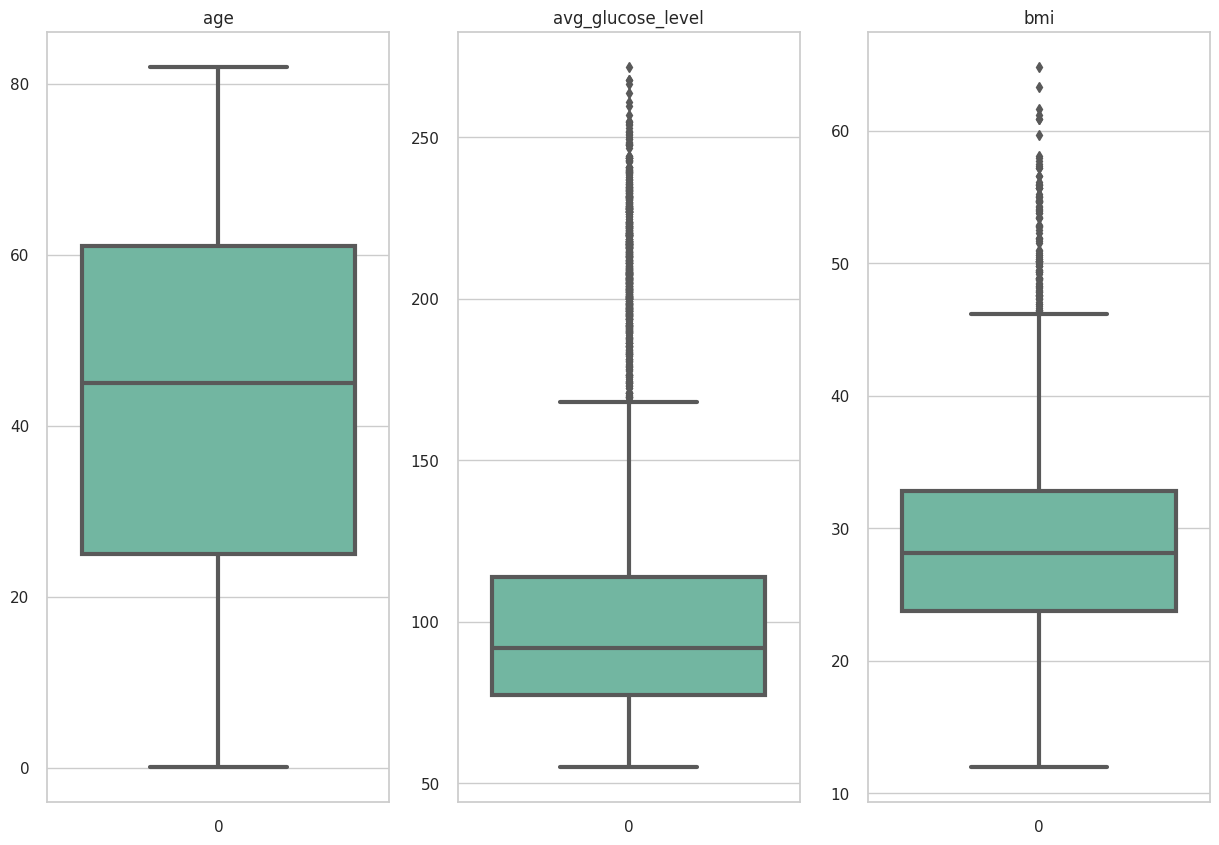

In [ ]:
#Boxplot sin datos atípicos
plt.figure(figsize = (15,10))
for i in range (len(num)):
    plt.subplot(1,3 , i+1)
    sns.boxplot(data = df_sin_outliers_sin_normalizar[num[i]], linewidth = 3, palette="Set2", fliersize = 5)
    plt.title(num[i])

Al revisar nuevamente los gráficos de cajas de las variables cuantitativas no se evidencia gran cambio dado que la cantidad de outliers encontrado fue pequeña, esto se debe a que el método utilizado para detección de outliers fue un método controlado.

In [ ]:
#En busca de calidad en los datos después de eliminar atípicos
for i in num:
    print(i.capitalize(), "\n", df_sin_outliers_sin_normalizar[i].value_counts(), "\n", "\n")

Age 
 78.00    99
57.00    94
52.00    90
54.00    87
51.00    86
         ..
1.40      3
0.48      3
0.40      2
0.08      2
0.16      2
Name: age, Length: 104, dtype: int64 
 

Avg_glucose_level 
 93.88     6
72.49     5
91.85     5
84.10     5
73.00     5
         ..
66.29     1
211.88    1
56.67     1
58.96     1
85.28     1
Name: avg_glucose_level, Length: 3941, dtype: int64 
 

Bmi 
 28.1    228
28.7     40
28.4     38
27.6     37
27.7     37
       ... 
64.8      1
48.2      1
53.5      1
63.3      1
14.9      1
Name: bmi, Length: 404, dtype: int64 
 



In [ ]:
#Información de la base de datos después de los cambios
df_sin_outliers_sin_normalizar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5054 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5054 non-null   object 
 1   age                5054 non-null   float64
 2   hypertension       5054 non-null   float64
 3   heart_disease      5054 non-null   float64
 4   ever_married       5054 non-null   object 
 5   work_type          5054 non-null   object 
 6   Residence_type     5054 non-null   object 
 7   avg_glucose_level  5054 non-null   float64
 8   bmi                5054 non-null   float64
 9   smoking_status     5054 non-null   object 
 10  stroke             5054 non-null   float64
dtypes: float64(6), object(5)
memory usage: 602.9+ KB


**Escalar base de datos y crear variables Dummy**

In [ ]:
#Base de datos a trabajar
df_sin_outliers_sin_normalizar

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
1,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1.0
2,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
3,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0
4,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5103,Female,13.0,0.0,0.0,No,children,Rural,103.08,18.6,Unknown,0.0
5104,Female,80.0,1.0,0.0,Yes,Private,Urban,83.75,28.1,never smoked,0.0
5106,Female,35.0,0.0,0.0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0.0
5107,Male,51.0,0.0,0.0,Yes,Private,Rural,166.29,25.6,formerly smoked,0.0


In [ ]:
#Escalar Variables

pd.set_option('display.float_format', lambda x: '%.4f' % x)

scaler = MinMaxScaler()

escaladas=df_sin_outliers_sin_normalizar
escaladas[cuantitativos]=scaler.fit_transform(df_sin_outliers_sin_normalizar[cuantitativos])
escaladas

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.8169,0.0000,1.0000,Yes,Private,Urban,0.8013,0.4659,formerly smoked,1.0000
1,Female,0.7437,0.0000,0.0000,Yes,Self-employed,Rural,0.6790,0.3049,never smoked,1.0000
2,Male,0.9756,0.0000,1.0000,Yes,Private,Rural,0.2345,0.3883,never smoked,1.0000
3,Female,0.5972,0.0000,0.0000,Yes,Private,Urban,0.5360,0.4242,smokes,1.0000
4,Female,0.9634,1.0000,0.0000,Yes,Self-employed,Rural,0.5493,0.2273,never smoked,1.0000
...,...,...,...,...,...,...,...,...,...,...,...
5103,Female,0.1577,0.0000,0.0000,No,children,Rural,0.2214,0.1250,Unknown,0.0000
5104,Female,0.9756,1.0000,0.0000,Yes,Private,Urban,0.1322,0.3049,never smoked,0.0000
5106,Female,0.4263,0.0000,0.0000,Yes,Self-employed,Rural,0.1287,0.3523,never smoked,0.0000
5107,Male,0.6216,0.0000,0.0000,Yes,Private,Rural,0.5132,0.2576,formerly smoked,0.0000


In [ ]:
#Revisamos el escalamiento de la base de datos
escaladas.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5054.0000,5054.0000,5054.0000,5054.0000,5054.0000,5054.0000
mean,0.5260,0.0968,0.0544,0.2344,0.3187,0.0487
std,0.2752,0.2957,0.2269,0.2072,0.1406,0.2152
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.3042,0.0000,0.0000,0.1024,0.2235,0.0000
50%,0.5483,0.0000,0.0000,0.1696,0.3049,0.0000
75%,0.7437,0.0000,0.0000,0.2710,0.3939,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Al realizar el describe se evidencia un buen escalamiento de los datos dado que en todos los casos el mínimo de la variable es 0 y el máximo es 1.

In [ ]:
#Utilizamos el método one hot encoding para tranformar las variables categóricas a numéricas
data_cat_Dummy = pd.get_dummies(escaladas, drop_first = True) # Codificación simulada. El parámetro drop_first permite sacar las k-1 simulaciones
                                                         # de los niveles categóricos, eliminando el primer nivel de codificación.
display(data_cat_Dummy)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.8169,0.0000,1.0000,0.8013,0.4659,1.0000,1,1,0,1,0,0,1,1,0,0
1,0.7437,0.0000,0.0000,0.6790,0.3049,1.0000,0,1,0,0,1,0,0,0,1,0
2,0.9756,0.0000,1.0000,0.2345,0.3883,1.0000,1,1,0,1,0,0,0,0,1,0
3,0.5972,0.0000,0.0000,0.5360,0.4242,1.0000,0,1,0,1,0,0,1,0,0,1
4,0.9634,1.0000,0.0000,0.5493,0.2273,1.0000,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,0.1577,0.0000,0.0000,0.2214,0.1250,0.0000,0,0,0,0,0,1,0,0,0,0
5104,0.9756,1.0000,0.0000,0.1322,0.3049,0.0000,0,1,0,1,0,0,1,0,1,0
5106,0.4263,0.0000,0.0000,0.1287,0.3523,0.0000,0,1,0,0,1,0,0,0,1,0
5107,0.6216,0.0000,0.0000,0.5132,0.2576,0.0000,1,1,0,1,0,0,0,1,0,0


**Toma de muestra de 10 datos stroke=1 y stroke=0**

Antes de empezar a crear los modelos se extraen dos muestras de 10 valores, en la primera se extraen 10 registros donde la variable stroke sea igual a 1 y en la segunda la variable stroke sea igual a 0. No se extrae una sola muestra totalmente aleatoria ya que dada la distribución de los datos es mucho más probable que se encunentren registros con stroke=0 a registros con stroke=1.

Estas muestras nos permitirán hacer una validación adicional a los modelos creados.

Estas muestras se eliminan de la base de datos para que los modelos no tengan acceso a estos en el momento del entrenamiento y la validación.

In [ ]:
#Sacamos 20 datos de la base de datos para realizar una prueba
muestra_1=data_cat_Dummy[data_cat_Dummy["stroke"]==1].sample(10,random_state=1234)
muestra_0=data_cat_Dummy[data_cat_Dummy["stroke"]==0].sample(10,random_state=1234)
m=muestra_1.index.tolist()
m.extend(muestra_0.index.tolist())
m

[190,
 182,
 31,
 52,
 71,
 6,
 95,
 132,
 159,
 5,
 1509,
 1885,
 2457,
 756,
 3890,
 398,
 2419,
 446,
 4395,
 4672]

In [ ]:
muestra_0

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1509,0.9390,0.0000,0.0000,0.1116,0.2727,0.0000,0,1,0,1,0,0,1,0,0,0
1885,0.3042,0.0000,0.0000,0.2816,0.1591,0.0000,1,0,0,1,0,0,1,0,0,1
2457,0.0356,0.0000,0.0000,0.0896,0.1042,0.0000,0,0,0,0,0,1,1,0,0,0
756,0.2188,0.0000,0.0000,0.3409,0.2178,0.0000,0,0,0,1,0,0,0,0,0,0
3890,0.9390,0.0000,0.0000,0.0114,0.3826,0.0000,1,1,0,0,1,0,1,0,0,0
398,0.3774,0.0000,0.0000,0.3106,0.5360,0.0000,0,1,0,1,0,0,0,0,0,1
2419,0.3774,0.0000,0.0000,0.0228,0.2557,0.0000,0,1,0,1,0,0,1,0,0,1
446,0.2554,0.0000,0.0000,0.0505,0.3011,0.0000,1,0,0,0,0,0,1,0,0,0
4395,0.4629,0.0000,0.0000,0.1324,0.2311,0.0000,0,1,0,1,0,0,0,0,0,1
4672,0.5117,0.0000,0.0000,0.2671,0.4773,0.0000,0,1,0,0,0,0,0,1,0,0


In [ ]:
muestra_1

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
190,0.7925,0.0000,0.0000,0.6955,0.6439,1.0000,0,1,0,1,0,0,1,1,0,0
182,0.3896,0.0000,0.0000,0.0970,0.3390,1.0000,0,1,0,1,0,0,0,0,0,1
31,0.5117,0.0000,0.0000,0.1306,0.2538,1.0000,1,1,0,1,0,0,0,0,0,0
52,0.9634,0.0000,1.0000,0.3332,0.2973,1.0000,0,1,0,1,0,0,0,0,1,0
71,0.8169,1.0000,0.0000,0.5724,0.3049,1.0000,0,1,0,1,0,0,0,1,0,0
6,0.9023,1.0000,1.0000,0.0691,0.2917,1.0000,1,1,0,1,0,0,0,0,1,0
95,0.9512,0.0000,0.0000,0.8333,0.3845,1.0000,0,1,0,1,0,0,0,0,1,0
132,0.8413,1.0000,0.0000,0.5903,0.4640,1.0000,1,0,0,1,0,0,0,0,1,0
159,0.9878,1.0000,0.0000,0.0872,0.2462,1.0000,0,1,0,0,1,0,0,0,1,0
5,0.9878,0.0000,0.0000,0.6052,0.3220,1.0000,1,1,0,1,0,0,1,1,0,0


In [ ]:
# Como se eliminaron algunos registros se resetean los indices de la base de datos.
datos_limpios=data_cat_Dummy.drop(m,axis=0).reset_index().drop("index",axis=1)
datos_limpios

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.8169,0.0000,1.0000,0.8013,0.4659,1.0000,1,1,0,1,0,0,1,1,0,0
1,0.7437,0.0000,0.0000,0.6790,0.3049,1.0000,0,1,0,0,1,0,0,0,1,0
2,0.9756,0.0000,1.0000,0.2345,0.3883,1.0000,1,1,0,1,0,0,0,0,1,0
3,0.5972,0.0000,0.0000,0.5360,0.4242,1.0000,0,1,0,1,0,0,1,0,0,1
4,0.9634,1.0000,0.0000,0.5493,0.2273,1.0000,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5029,0.1577,0.0000,0.0000,0.2214,0.1250,0.0000,0,0,0,0,0,1,0,0,0,0
5030,0.9756,1.0000,0.0000,0.1322,0.3049,0.0000,0,1,0,1,0,0,1,0,1,0
5031,0.4263,0.0000,0.0000,0.1287,0.3523,0.0000,0,1,0,0,1,0,0,0,1,0
5032,0.6216,0.0000,0.0000,0.5132,0.2576,0.0000,1,1,0,1,0,0,0,1,0,0


##**Prueba sin balanceo**

**Variable objetivos: Primeras pruebas**

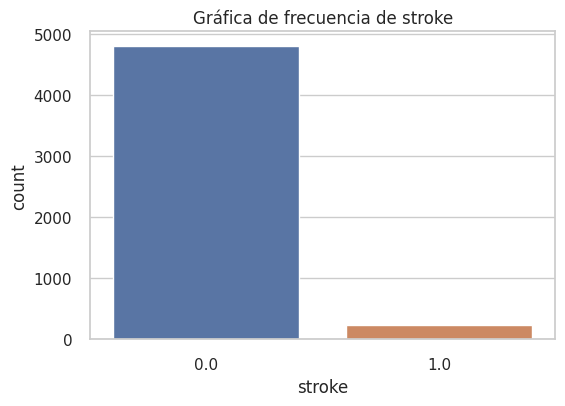

In [ ]:
#Se crea la figura para visualizar el desbalance de la variable salida
plt.figure(figsize=(6,4))

plt.title('Gráfica de frecuencia de stroke')
sns.countplot(x=datos_limpios["stroke"])


plt.show()

In [ ]:
proporcion= (100*((datos_limpios["stroke"]==1).sum())/datos_limpios.shape[0])
print(f"La proporción de la varible stroke = 1 de la base de datos es de {round(proporcion,2)} % después de limpiar las variables y eliminando datos atípicos")

La proporción de la varible stroke = 1 de la base de datos es de 4.69 % después de limpiar las variables y eliminando datos atípicos


In [ ]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5034 non-null   float64
 1   hypertension                    5034 non-null   float64
 2   heart_disease                   5034 non-null   float64
 3   avg_glucose_level               5034 non-null   float64
 4   bmi                             5034 non-null   float64
 5   stroke                          5034 non-null   float64
 6   gender_Male                     5034 non-null   uint8  
 7   ever_married_Yes                5034 non-null   uint8  
 8   work_type_Never_worked          5034 non-null   uint8  
 9   work_type_Private               5034 non-null   uint8  
 10  work_type_Self-employed         5034 non-null   uint8  
 11  work_type_children              5034 non-null   uint8  
 12  Residence_type_Urban            50

In [ ]:
#Nuevas columnas sin la variable stroke
vDepsb = list(datos_limpios.columns)
vDepsb.remove('stroke')
vDepsb

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'ever_married_Yes',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

In [ ]:
#La base de datos se parte en dos con las variables de la x y la Y
Xl = datos_limpios[vDepsb]
yl = datos_limpios['stroke']

In [ ]:
Xl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5034 non-null   float64
 1   hypertension                    5034 non-null   float64
 2   heart_disease                   5034 non-null   float64
 3   avg_glucose_level               5034 non-null   float64
 4   bmi                             5034 non-null   float64
 5   gender_Male                     5034 non-null   uint8  
 6   ever_married_Yes                5034 non-null   uint8  
 7   work_type_Never_worked          5034 non-null   uint8  
 8   work_type_Private               5034 non-null   uint8  
 9   work_type_Self-employed         5034 non-null   uint8  
 10  work_type_children              5034 non-null   uint8  
 11  Residence_type_Urban            5034 non-null   uint8  
 12  smoking_status_formerly smoked  50

In [ ]:
#Separación de variables de entrenamiento y validación
Xl_train, Xl_test, yl_train, yl_test = train_test_split(
                                        Xl,
                                        yl.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/

In [ ]:
modelLR5=LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced").fit(Xl_train, yl_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


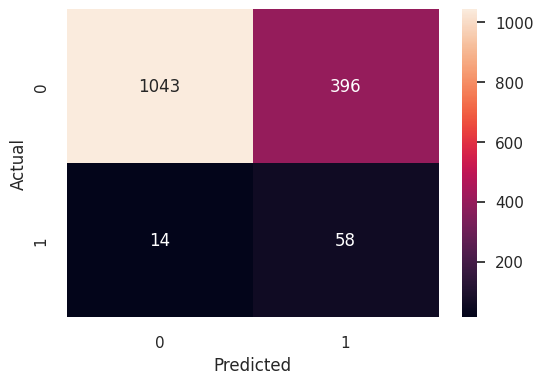

              precision    recall  f1-score   support

         0.0       0.99      0.72      0.84      1439
         1.0       0.13      0.81      0.22        72

    accuracy                           0.73      1511
   macro avg       0.56      0.77      0.53      1511
weighted avg       0.95      0.73      0.81      1511



In [ ]:
#Creamos matriz de confusión
y_predrl = modelLR5.predict(Xl_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(yl_test, y_predrl)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(yl_test,y_predrl))

In [ ]:
#Validamos las muestras 0 para el random forest
y_predrl0= modelLR5.predict(muestra_0.drop("stroke",axis=1))
print(y_predrl0)
print("y_predrl0",100*y_predrl0.tolist().count(0)/10,"%")

[1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_predrl0 80.0 %


In [ ]:
#Validamos las muestras 0 para el random forest
y_predrl1= modelLR5.predict(muestra_1.drop("stroke",axis=1))
print(y_predrl1)
print("y_predrl1",100*y_predrl1.tolist().count(1)/10,"%")

[1. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
y_predrl1 80.0 %


Vemos que el primer acercamiento sin creación de datos sintéticos por una variable de salida muy desbalanceada arroja una predicción del 80% tanto en valores positivos como negativos en la detección del stroke.

Sin embargo, debido a la disparidad entre los valores 0 y 1 de stroke se decide utilizar el método oversampler para generar datos sinteticos que nivelen ambos valores.

Se opta por este método en vez de reducir los valores negativos de la variable debido a que en dado caso se eliminaría una porción demasiado grande de la base de datos.

##Balanceo de la variable objetivo

**Balanceo de la variable de salida**

In [ ]:
#Se balancea la variable salida con oversampler
oversampler = RandomOverSampler()

X_resampled, y_resampled = oversampler.fit_resample(datos_limpios.drop('stroke', axis=1), datos_limpios['stroke'])

df1 = pd.DataFrame(X_resampled, columns=datos_limpios.columns.drop('stroke'))
df2 = pd.DataFrame(y_resampled)

df_balanced = pd.concat([df1, df2], axis=1)

In [ ]:
#Se verifica la nueva composición de la base de datos con los datos sintéticos
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9596 entries, 0 to 9595
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             9596 non-null   float64
 1   hypertension                    9596 non-null   float64
 2   heart_disease                   9596 non-null   float64
 3   avg_glucose_level               9596 non-null   float64
 4   bmi                             9596 non-null   float64
 5   gender_Male                     9596 non-null   uint8  
 6   ever_married_Yes                9596 non-null   uint8  
 7   work_type_Never_worked          9596 non-null   uint8  
 8   work_type_Private               9596 non-null   uint8  
 9   work_type_Self-employed         9596 non-null   uint8  
 10  work_type_children              9596 non-null   uint8  
 11  Residence_type_Urban            9596 non-null   uint8  
 12  smoking_status_formerly smoked  95

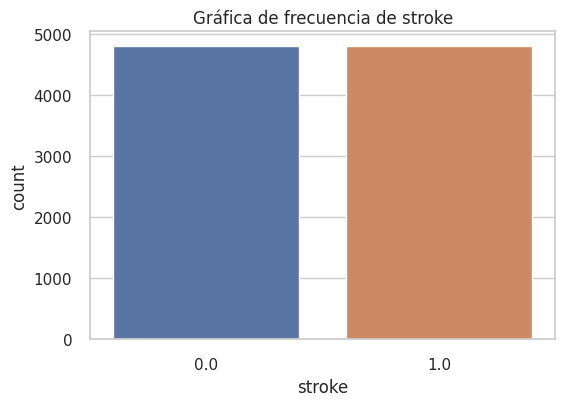

In [ ]:
#Se recrea la imagen nuevamente para ver la variable salida balanceada
plt.figure(figsize=(6,4))

plt.title('Gráfica de frecuencia de stroke')
sns.countplot(x=df_balanced['stroke'])
#ax=sns.countplot(x=df_balanced['stroke'])

#for p in ax.patches:
    #ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

Como se observa en el gráfico anterior la variable stroke ya se encuentra nivelada en sus opciones.

In [ ]:
#Nueva base de datos escalada, con datos sintéticos y codificada
data_cat_Dummy = pd.get_dummies(df_balanced, drop_first = True)

display(data_cat_Dummy)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.8169,0.0000,1.0000,0.8013,0.4659,1,1,0,1,0,0,1,1,0,0,1.0000
1,0.7437,0.0000,0.0000,0.6790,0.3049,0,1,0,0,1,0,0,0,1,0,1.0000
2,0.9756,0.0000,1.0000,0.2345,0.3883,1,1,0,1,0,0,0,0,1,0,1.0000
3,0.5972,0.0000,0.0000,0.5360,0.4242,0,1,0,1,0,0,1,0,0,1,1.0000
4,0.9634,1.0000,0.0000,0.5493,0.2273,0,1,0,0,1,0,0,0,1,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9591,0.7192,0.0000,0.0000,0.7232,0.3049,1,1,0,1,0,0,0,1,0,0,1.0000
9592,0.9268,0.0000,0.0000,0.1608,0.3049,0,0,0,1,0,0,1,0,0,0,1.0000
9593,0.9634,0.0000,0.0000,0.1967,0.1799,0,1,0,1,0,0,1,0,0,1,1.0000
9594,0.7070,0.0000,0.0000,0.0219,0.3030,0,1,0,1,0,0,0,1,0,0,1.0000


In [ ]:
#Nuevas columnas sin la variable stroke
vDep = list(data_cat_Dummy.columns)
vDep.remove('stroke')
vDep

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'ever_married_Yes',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

Separamos la variable independiente de las variables independientes.

In [ ]:
#La base de datos se parte en dos con las variables de la x y la Y
X = data_cat_Dummy[vDep]
y = data_cat_Dummy['stroke']

In [ ]:
#Composición de las variables independientes
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9596 entries, 0 to 9595
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             9596 non-null   float64
 1   hypertension                    9596 non-null   float64
 2   heart_disease                   9596 non-null   float64
 3   avg_glucose_level               9596 non-null   float64
 4   bmi                             9596 non-null   float64
 5   gender_Male                     9596 non-null   uint8  
 6   ever_married_Yes                9596 non-null   uint8  
 7   work_type_Never_worked          9596 non-null   uint8  
 8   work_type_Private               9596 non-null   uint8  
 9   work_type_Self-employed         9596 non-null   uint8  
 10  work_type_children              9596 non-null   uint8  
 11  Residence_type_Urban            9596 non-null   uint8  
 12  smoking_status_formerly smoked  95

In [ ]:
#Composición de la variable dependiente
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9596 entries, 0 to 9595
Series name: stroke
Non-Null Count  Dtype  
--------------  -----  
9596 non-null   float64
dtypes: float64(1)
memory usage: 75.1 KB


**Separación de datos de entrenamiento y prueba**

In [ ]:
#Separación de variables de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

#Construcción de modelos

Modelo 1: randomForest con con 100 árboles y 5 niveles de profundidad

In [ ]:
#Tomamos el modelo random para iniciar la clasificación

modelo = RandomForestClassifier(
            n_estimators =  100,
            max_features =  'auto',
            max_depth    =  5,
            criterion    = 'gini'
         )


# Entrenamiento del modelo

modelo.fit(X_train, y_train)

<ipython-input-77-83a5d5bac085>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=5, max_features='auto')

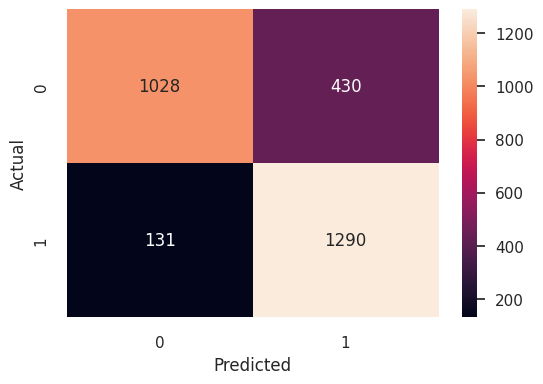

              precision    recall  f1-score   support

         0.0       0.89      0.71      0.79      1458
         1.0       0.75      0.91      0.82      1421

    accuracy                           0.81      2879
   macro avg       0.82      0.81      0.80      2879
weighted avg       0.82      0.81      0.80      2879



In [ ]:
#Creamos matriz de confusión
y_predMod = modelo.predict(X_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_predMod)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test,y_predMod))

Se encuentra una metricas cercanas al 80%. El modelo clasifica correctamente 81% de los elementos. Por otro lado la medida recall nos indica que el 80% de los elementos positivos son identificados correctamente y combinando estos dos valores se obtiene una media armonica, métrica f1 del 80%, todo esto con un soporte total de 2.879 datos divididos de forma similar entre positivos y negativos. Vale la pena aclarar que aunque se nivelaron los valores 0 y 1 de la variable stroke en este modelo quedó levemente diferente por la aleatoriedad de la selección de los datos de entrenamiento y prueba.

Se revisan otros modelos con el fin de identificar si se pueden obtener mejores resultados con alguno de ellos

In [ ]:
#Creación de modelos sin mejorar los hiperparámetros
modelSVC       = svm.SVC(kernel='linear', probability = True).fit(X_train, y_train)
modelLR        = LogisticRegression(random_state=0).fit(X_train, y_train)
modelknn       = neighbors.KNeighborsClassifier(n_neighbors = 31).fit(X_train, y_train)
modelComplNB   = ComplementNB().fit(X_train, y_train)
modelTreeClas  = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
modelRanForest = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=0).fit(X_train, y_train)
ModelNN        = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 2), random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

In [ ]:
#Modelos
y_SVC      = modelSVC.predict(X_test)
y_LR       = modelLR.predict(X_test)
y_knn      = modelknn.predict(X_test)
y_ComplNB  = modelComplNB.predict(X_test)
y_TreeClas = modelTreeClas.predict(X_test)
y_RanForest= modelRanForest.predict(X_test)
y_NN      = ModelNN.predict(X_test)

In [ ]:
#Recall de los modelos
print("="*5 + f" Recall de los modelos " + "="*5)
print()
print("modelSVC      :",recall_score(y_test, y_SVC      ))
print("modelLR       :",recall_score(y_test, y_LR       ))
print("modelknn      :",recall_score(y_test, y_knn      ))
print("modelComplNB  :",recall_score(y_test, y_ComplNB  ))
print("modelTreeClas :",recall_score(y_test, y_TreeClas ))
print("modelRanForest:",recall_score(y_test, y_RanForest))
print("ModelNN       :",recall_score(y_test, y_NN      ))

===== Recall de los modelos =====

modelSVC      : 0.8282899366643209
modelLR       : 0.8163265306122449
modelknn      : 0.88036593947924
modelComplNB  : 0.6931738212526389
modelTreeClas : 1.0
modelRanForest: 0.9690358902181563
ModelNN       : 0.932441942294159


In [ ]:
#Precisión de los modelos
print("="*5 + f" Precisión de los modelos " + "="*5)
print()
print("modelSVC      :",precision_score(y_test, y_SVC      ))
print("modelLR       :",precision_score(y_test, y_LR       ))
print("modelknn      :",precision_score(y_test, y_knn      ))
print("modelComplNB  :",precision_score(y_test, y_ComplNB  ))
print("modelTreeClas :",precision_score(y_test, y_TreeClas ))
print("modelRanForest:",precision_score(y_test, y_RanForest))
print("ModelNN       :",precision_score(y_test, y_NN      ))

===== Precisión de los modelos =====

modelSVC      : 0.7525575447570333
modelLR       : 0.7611548556430446
modelknn      : 0.7495506291192331
modelComplNB  : 0.6691576086956522
modelTreeClas : 0.9492317969271877
modelRanForest: 0.84375
ModelNN       : 0.7597477064220184


In [ ]:
#F1 de los modelos
print("="*5 + f" F1 de los modelos " + "="*5)
print()
print("modelSVC      :",f1_score(y_test, y_SVC      ))
print("modelLR       :",f1_score(y_test, y_LR       ))
print("modelknn      :",f1_score(y_test, y_knn      ))
print("modelComplNB  :",f1_score(y_test, y_ComplNB  ))
print("modelTreeClas :",f1_score(y_test, y_TreeClas ))
print("modelRanForest:",f1_score(y_test, y_RanForest))
print("ModelNN       :",f1_score(y_test, y_NN      ))


===== F1 de los modelos =====

modelSVC      : 0.788609715242881
modelLR       : 0.7877758913412564
modelknn      : 0.8097087378640777
modelComplNB  : 0.6809540269616315
modelTreeClas : 0.973954763536669
modelRanForest: 0.9020635440550278
ModelNN       : 0.8372827804107426


In [ ]:
#Exactitud de los modelos
print("="*5 + f" F1 de los modelos " + "="*5)
print()
print("modelSVC      :",accuracy_score(y_test, y_SVC      ))
print("modelLR       :",accuracy_score(y_test, y_LR       ))
print("modelknn      :",accuracy_score(y_test, y_knn      ))
print("modelComplNB  :",accuracy_score(y_test, y_ComplNB  ))
print("modelTreeClas :",accuracy_score(y_test, y_TreeClas ))
print("modelRanForest:",accuracy_score(y_test, y_RanForest))
print("ModelNN       :",accuracy_score(y_test, y_NN      ))


===== F1 de los modelos =====

modelSVC      : 0.780826675929142
modelLR       : 0.7829107328933658
modelknn      : 0.7957624175060785
modelComplNB  : 0.6794025703369225
modelTreeClas : 0.9736019451198332
modelRanForest: 0.8961444946161862
ModelNN       : 0.8211184439041334


##Matrices de confusión

          ==================== SVC ====================


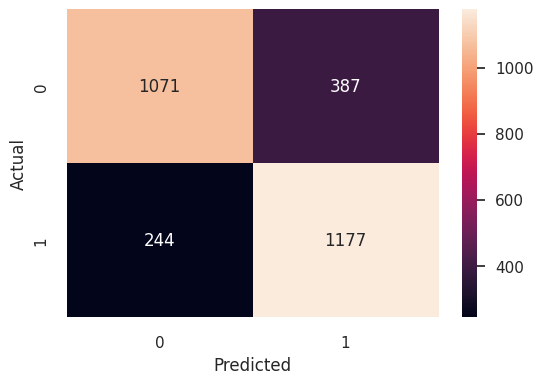

              precision    recall  f1-score   support

         0.0       0.81      0.73      0.77      1458
         1.0       0.75      0.83      0.79      1421

    accuracy                           0.78      2879
   macro avg       0.78      0.78      0.78      2879
weighted avg       0.78      0.78      0.78      2879

          ==================== LR ====================


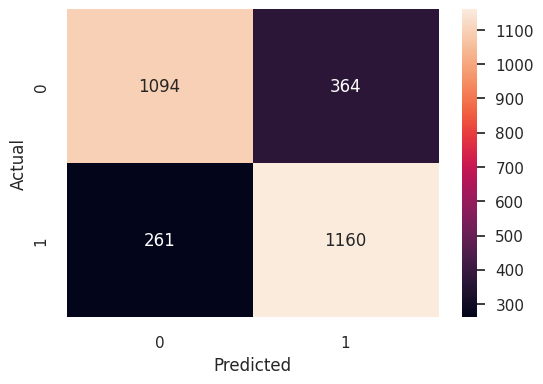

              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78      1458
         1.0       0.76      0.82      0.79      1421

    accuracy                           0.78      2879
   macro avg       0.78      0.78      0.78      2879
weighted avg       0.78      0.78      0.78      2879

          ==================== KNN ====================


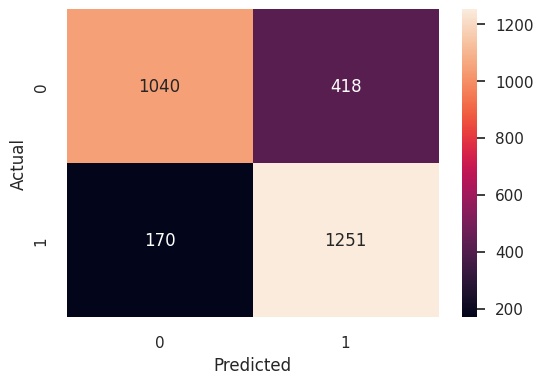

              precision    recall  f1-score   support

         0.0       0.86      0.71      0.78      1458
         1.0       0.75      0.88      0.81      1421

    accuracy                           0.80      2879
   macro avg       0.80      0.80      0.79      2879
weighted avg       0.81      0.80      0.79      2879

          ==================== ComplNB ====================


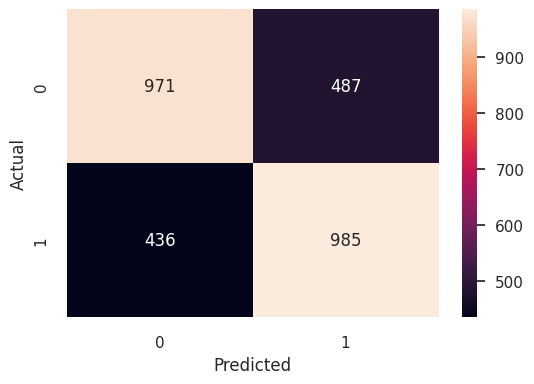

              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68      1458
         1.0       0.67      0.69      0.68      1421

    accuracy                           0.68      2879
   macro avg       0.68      0.68      0.68      2879
weighted avg       0.68      0.68      0.68      2879

          ==================== TreeClas ====================


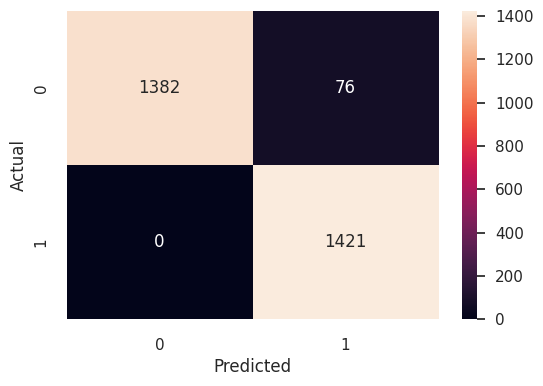

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      1458
         1.0       0.95      1.00      0.97      1421

    accuracy                           0.97      2879
   macro avg       0.97      0.97      0.97      2879
weighted avg       0.97      0.97      0.97      2879

          ==================== RanForest ====================


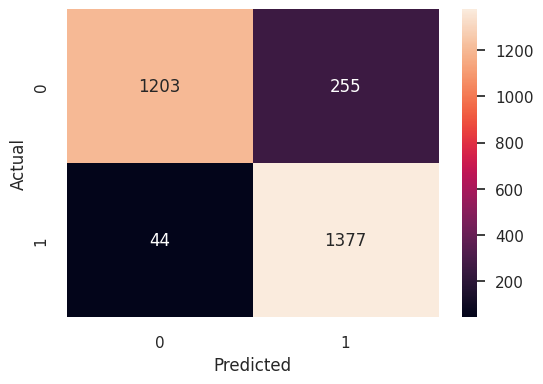

              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      1458
         1.0       0.84      0.97      0.90      1421

    accuracy                           0.90      2879
   macro avg       0.90      0.90      0.90      2879
weighted avg       0.91      0.90      0.90      2879

          ==================== NN ====================


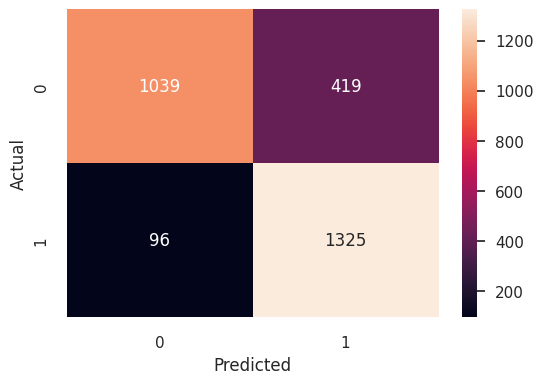

              precision    recall  f1-score   support

         0.0       0.92      0.71      0.80      1458
         1.0       0.76      0.93      0.84      1421

    accuracy                           0.82      2879
   macro avg       0.84      0.82      0.82      2879
weighted avg       0.84      0.82      0.82      2879



In [ ]:
#Matriz de confusión por cada modelo
y_modelos=[y_SVC,y_LR,y_knn,y_ComplNB,y_TreeClas,y_RanForest,y_NN]
nombres_modelos=["SVC","LR","KNN","ComplNB","TreeClas","RanForest","NN"]

for i in range(len(y_modelos)):


    print("          "+"="*20 + f" {nombres_modelos[i]} " + "="*20)

    y_pred = y_modelos[i]


    # Crear matriz de confusión
    conf_mat = confusion_matrix(y_test, y_pred)

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(6,4))

    # Crear mapa de calor de la matriz de confusión con Seaborn
    sns.heatmap(conf_mat
                , annot=True  # agregar valores en cada celda
                , fmt='d'    # formato de los valores (d = decimal)
               )

    # Agregar etiquetas a los ejes x e y
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    # Mostrar la figura
    plt.show()

    # Se imprimen las medidas de rendimiento del modelo
    print(metrics.classification_report(y_test, y_pred))

Las anteriores matrices de confusión se evidencia que la mayoría de los modelos presentan metricas cercanas al 80%, a excepción de arboles de clasificación y random forest que presentan valores cercanos al 90% o incluso superiores. Sin embargo, esto podría deberse a un sobreajuste de estos modelos.

##Curva ROC

0.85: SVC(kernel='linear', probability=True)
0.85: LogisticRegression(random_state=0)
0.88: KNeighborsClassifier(n_neighbors=31)
0.75: ComplementNB()
0.97: DecisionTreeClassifier(random_state=0)
0.97: RandomForestClassifier(max_depth=8, n_estimators=50, random_state=0)
0.89: MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 2), random_state=0,
              solver='lbfgs')


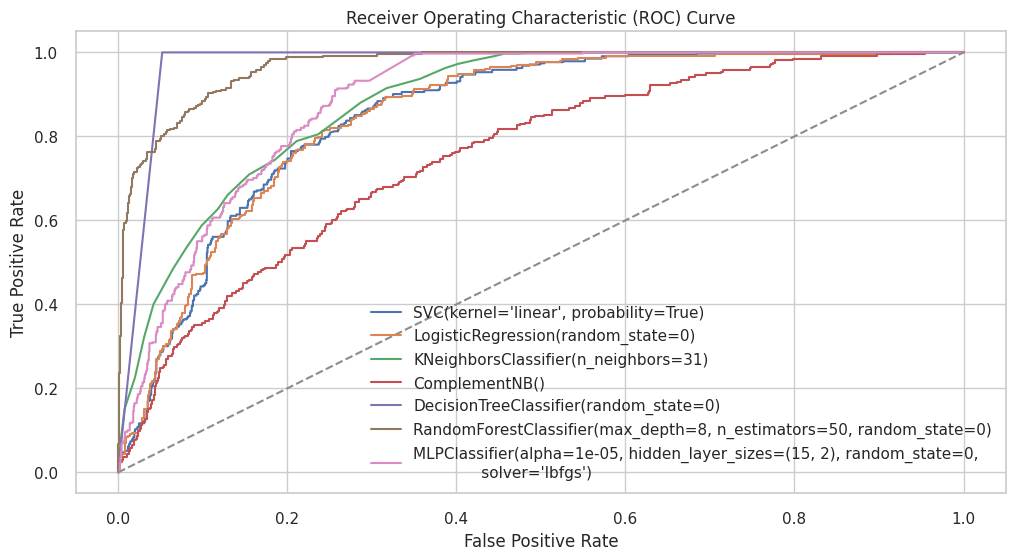

In [ ]:
#Se crea la curva ROC
# Crear figura de tamaño 10x6
fig = plt.figure(figsize=(12, 6))

# Lista de modelos a evaluar
Modelos = [modelSVC, modelLR, modelknn, modelComplNB, modelTreeClas, modelRanForest, ModelNN]

# Iterar sobre los modelos
for i in range(len(Modelos)):

    # Obtener probabilidades de predicción del modelo
    probs = Modelos[i].predict_proba(X_test)

    # Seleccionar la columna correspondiente a la probabilidad de clase positiva
    probs = probs[:, 1]

    # Calcular el AUC-ROC
    auc = roc_auc_score(y_test, probs*(1))

    # Calcular las tasas de FPR y TPR
    fpr, tpr, _ = roc_curve(y_test, probs*(1))

    # Graficar la curva ROC del modelo actual
    plt.plot(fpr, tpr, label=Modelos[i])

    # Mostrar el AUC-ROC y el nombre del modelo
    print("{:.2f}: {}".format(auc, Modelos[i]))


# Graficar la línea diagonal punteada (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')  # Etiqueta del eje x
plt.ylabel('True Positive Rate')  # Etiqueta del eje y
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Título del gráfico
plt.legend()  # Mostrar la leyenda de los modelos
plt.show()  # Mostrar el gráfico

Las curvas ROC parecen respaldar los resultados anteriores, donde la mayoría de los modelos presentan resultados similares a excepción de random forest y arboles de decisión, por esta razón se utilizarán las muestras anteriormente extraidas para verificar que tan bien los clasifica para validar si el modelo es realmente muy bueno o si simplemente está presentando sobreajuste.

###**Prueba árboles de Decisión y Random Forest**

**Validación muestras Arbol de decisión**

In [ ]:
#Validamos las muestras 0 para el árbol de decisiones
y_TreeClasm0 = modelTreeClas.predict(muestra_0.drop("stroke",axis=1))
print(y_TreeClasm0)
print("y_TreeClasm0",100*y_TreeClasm0.tolist().count(0)/10,"%")

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_TreeClasm0 90.0 %


In [ ]:
#Validamos las muestras 1 para el árbol de decisiones
y_TreeClasm1 = modelTreeClas.predict(muestra_1.drop("stroke",axis=1))
print(y_TreeClasm1)
print("y_TreeClasm1",100*y_TreeClasm1.tolist().count(1)/10,"%")

[0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
y_TreeClasm1 20.0 %


**Validación muestras random forest**


In [ ]:
#Validamos las muestras 0 para el random forest
y_RanForestm0= modelRanForest.predict(muestra_0.drop("stroke",axis=1))
print(y_RanForestm0)
print("y_RanForestm0",100*y_RanForestm0.tolist().count(0)/10,"%")

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_RanForestm0 90.0 %


In [ ]:
#Validamos las muestras 1 para el random forest
y_RanForestm1= modelRanForest.predict(muestra_1.drop("stroke",axis=1))
print(y_RanForestm1)
print("y_RanForestm1",100*y_RanForestm1.tolist().count(1)/10,"%")

[1. 0. 0. 1. 1. 0. 1. 0. 1. 1.]
y_RanForestm1 60.0 %


Al analizar las muestras se evidencia que ambos modelos reducen su efectividad al intentar identificar casos positivos de stroke, sin embargo son buenos para identificar datos negativos. Esto se puede deber a que originalmente habían muy pocos casos positivos y por tanto la mayoría de los datos de este tipo fueron construidos sinteticamente.

Ahora bien, entre estos dos modelos el mejor para identificar valores positivos es random forest.

Igualmente, se realizará validación cruzada para revisar cual de los modelos trabajados presenta mejores metricas disminuyendo la aleatoriedad de los datos de entrenamiento y prueba seleccionados.

##Validación Cruzada (Cross validation)

In [ ]:
# definicion de la variable con el número de pliegues
CV = 10

# Lista con las métricas de scoring
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Lista de modelos que se ejecutarán (con base en los ya definidos)
models = [
    ('modelSVC', modelSVC),
    ('modelLR', modelLR),
    ('modelknn', modelknn),
    ('modelComplNB', modelComplNB),
    ('modelTreeClas', modelTreeClas),
    ('modelRanForest', modelRanForest),
    ('modelNN', ModelNN)
]

# Crear un DataFrame vacío para almacenar los resultados
cv_df = pd.DataFrame()

# Para cada modelo definido en la lista models aplicar validacion cruzada y almacenarlo en el dataframe cv_df
for model_name, model in models:
    scores = cross_validate(model, X, y, cv=CV, scoring=scoring, return_train_score=False)
    model_scores = pd.DataFrame(scores)
    model_scores['model_name'] = model_name
    cv_df = pd.concat([cv_df, model_scores], ignore_index=True)

# Reordenar las columnas devueltas por cross_validate
column_order = ['model_name', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']
cv_df = cv_df.reindex(columns=column_order)

cv_df

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

,model_name,test_accuracy,test_precision,test_recall,test_f1
0,modelSVC,0.7677,0.7466,0.8104,0.7772
1,modelSVC,0.7781,0.7495,0.8354,0.7901
2,modelSVC,0.7771,0.7481,0.8354,0.7894
3,modelSVC,0.7760,0.7543,0.8187,0.7852
4,modelSVC,0.7438,0.7151,0.8104,0.7598
...,...,...,...,...,...
65,modelNN,0.8187,0.7484,0.9604,0.8412
66,modelNN,0.8227,0.7636,0.9354,0.8408
67,modelNN,0.8217,0.7588,0.9437,0.8412
68,modelNN,0.8196,0.7602,0.9332,0.8379


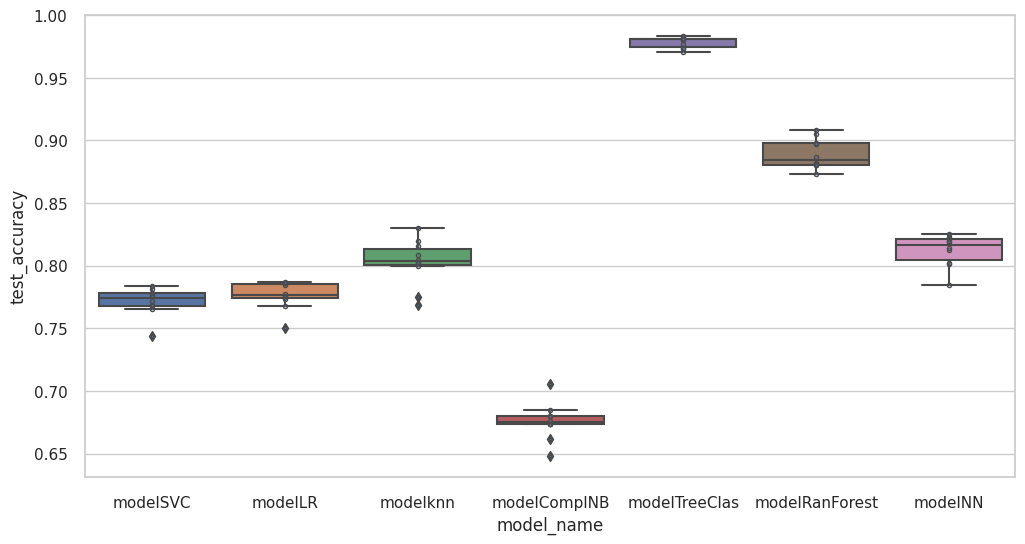

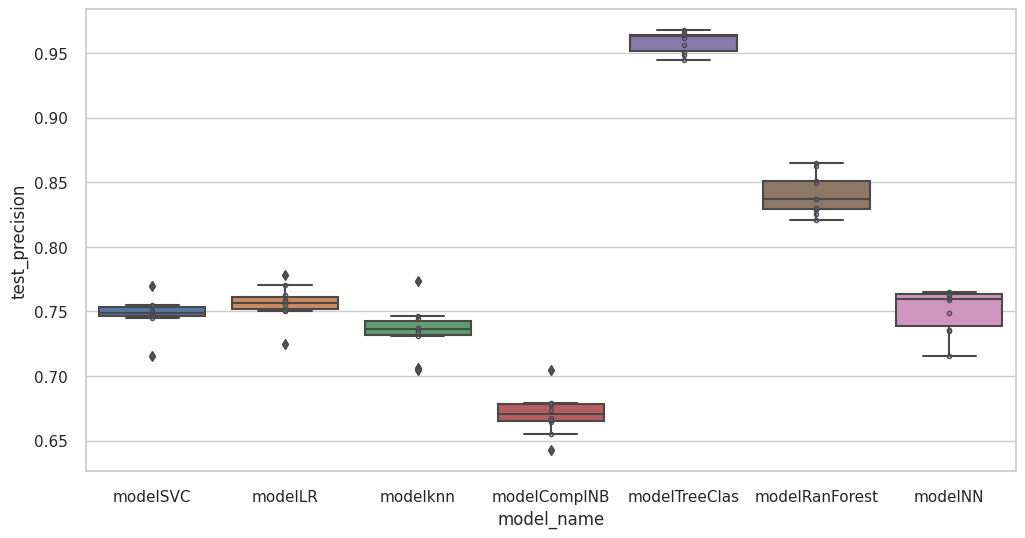

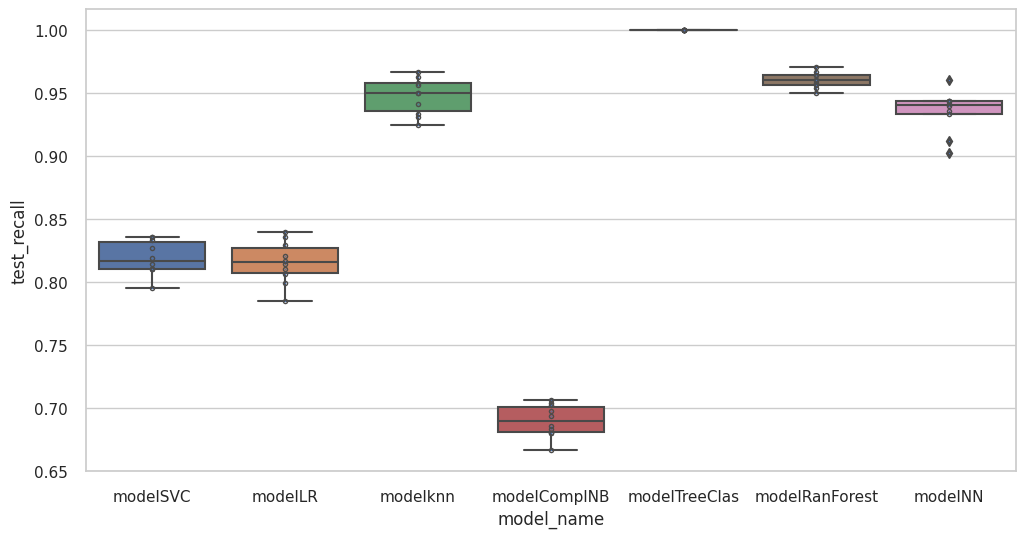

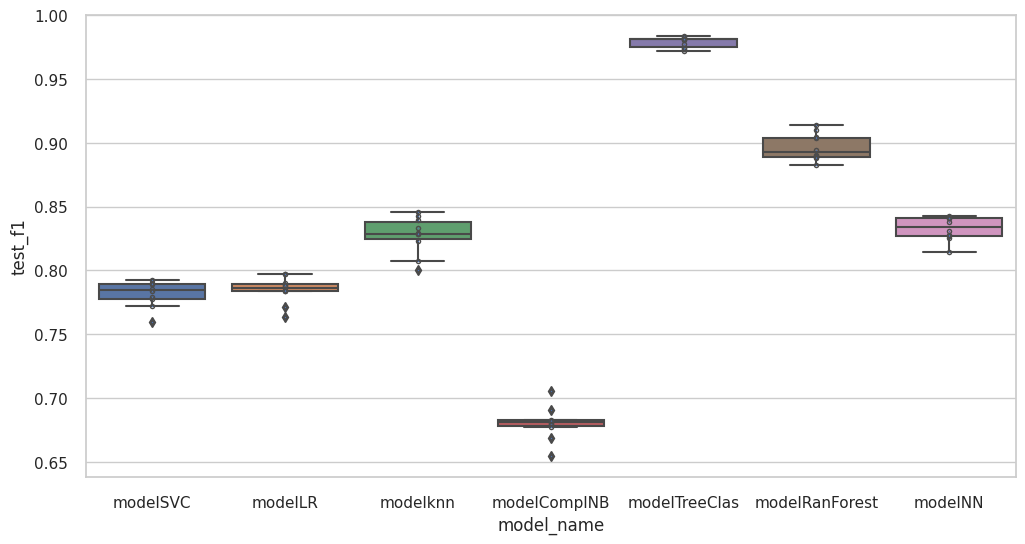

In [ ]:
# Gráfica de las métricas de los modelos

for j in cv_df.columns[1:]:

    fig = plt.figure(figsize=(12,6))

    sns.boxplot(x='model_name', y=j, data=cv_df)
    sns.stripplot(x='model_name', y=j, data=cv_df,
                  size=1, jitter=False, edgecolor="gray", linewidth=3)
    plt.show()

Los anteriores gráficos muestran que los mejores modelos son arboles de decisión y random forest con valores cercanos o incluso superirores al 90%, lo cual sigue sugiriendo la presencia de sobreajuste.

Entre los demás modelos el que presenta mejores metricas son las redes neuronales.

Estos valores se validan númericamente a continuación con el promedio de cada métrica, en donde se evidencia que en todas el top tres es el mismo: arboles de decisión, random forest y redes neuronales.

In [ ]:
#La media de cada métrica por modelo
for j in cv_df.columns[1:]:
    print(f"\n{j} \n")
    print(cv_df.groupby('model_name')[j].mean().sort_values(ascending=False))


test_accuracy 

model_name
modelTreeClas    0.9784
modelRanForest   0.8891
modelNN          0.8122
modelknn         0.8026
modelLR          0.7764
modelSVC         0.7714
modelComplNB     0.6756
Name: test_accuracy, dtype: float64

test_precision 

model_name
modelTreeClas    0.9587
modelRanForest   0.8407
modelLR          0.7564
modelNN          0.7509
modelSVC         0.7479
modelknn         0.7351
modelComplNB     0.6709
Name: test_precision, dtype: float64

test_recall 

model_name
modelTreeClas    1.0000
modelRanForest   0.9606
modelknn         0.9475
modelNN          0.9356
modelSVC         0.8191
modelLR          0.8157
modelComplNB     0.6901
Name: test_recall, dtype: float64

test_f1 

model_name
modelTreeClas    0.9789
modelRanForest   0.8966
modelNN          0.8329
modelknn         0.8277
modelLR          0.7848
modelSVC         0.7818
modelComplNB     0.6803
Name: test_f1, dtype: float64


####**Prueba todos los modelos sin hiperparámetros**

**Validación muestra**

Para validar los datos anteriores se usan las muestras extraidas anteriormente para verificar si los modelos son buenos o si los datos están presentando sobreajuste.

In [ ]:
# Muestra stroke=0

y_SVCm0=modelSVC.predict(muestra_0.drop("stroke",axis=1))
y_LRm0=modelLR.predict(muestra_0.drop("stroke",axis=1))
y_knnm0=modelknn.predict(muestra_0.drop("stroke",axis=1))
y_ComplNBm0=modelComplNB.predict(muestra_0.drop("stroke",axis=1))
y_TreeClasm0=modelTreeClas.predict(muestra_0.drop("stroke",axis=1))
y_RanForestm0=modelRanForest.predict(muestra_0.drop("stroke",axis=1))
y_NNm0=ModelNN.predict(muestra_0.drop("stroke",axis=1))

print("y_SVCm0",100*y_SVCm0.tolist().count(0)/10,"%")
print("y_LRm0",100*y_LRm0.tolist().count(0)/10,"%")
print("y_knnm0",100*y_knnm0.tolist().count(0)/10,"%")
print("y_ComplNBm0",100*y_ComplNBm0.tolist().count(0)/10,"%")
print("y_TreeClasm0",100*y_TreeClasm0.tolist().count(0)/10,"%")
print("y_RanForestm0",100*y_RanForestm0.tolist().count(0)/10,"%")
print("y_NNm0",100*y_NNm0.tolist().count(0)/10,"%")


y_SVCm0 80.0 %
y_LRm0 80.0 %
y_knnm0 70.0 %
y_ComplNBm0 80.0 %
y_TreeClasm0 90.0 %
y_RanForestm0 90.0 %
y_NNm0 80.0 %


In [ ]:
# Muestra stroke=1

y_SVCm1=modelSVC.predict(muestra_1.drop("stroke",axis=1))
y_LRm1=modelLR.predict(muestra_1.drop("stroke",axis=1))
y_knnm1=modelknn.predict(muestra_1.drop("stroke",axis=1))
y_ComplNBm1=modelComplNB.predict(muestra_1.drop("stroke",axis=1))
y_TreeClasm1=modelTreeClas.predict(muestra_1.drop("stroke",axis=1))
y_RanForestm1=modelRanForest.predict(muestra_1.drop("stroke",axis=1))
y_NNm1=ModelNN.predict(muestra_1.drop("stroke",axis=1))

print("y_SVCm1",100*y_SVCm1.tolist().count(1)/10,"%")
print("y_LRm1",100*y_LRm1.tolist().count(1)/10,"%")
print("y_knnm1",100*y_knnm1.tolist().count(1)/10,"%")
print("y_ComplNBm1",100*y_ComplNBm1.tolist().count(1)/10,"%")
print("y_TreeClasm1",100*y_TreeClasm1.tolist().count(1)/10,"%")
print("y_RanForestm1",100*y_RanForestm1.tolist().count(1)/10,"%")
print("y_NNm1",100*y_NNm1.tolist().count(1)/10,"%")


y_SVCm1 80.0 %
y_LRm1 80.0 %
y_knnm1 70.0 %
y_ComplNBm1 70.0 %
y_TreeClasm1 20.0 %
y_RanForestm1 60.0 %
y_NNm1 70.0 %


Al revisar las muestras se evidencia que la mayoría de los modelos disminuyen su rendimiento al intentar clasificar de forma correcta los registros positivos de la variable stroke. Los únicos dos que no presentan esta reducción del rendimiento son la máquina de soporte vectorial y regresión logistica.

El caso de los arboles de decisión es curioso, donde se observa que el modelo es muy bueno para identificar los casos negativos pero muy malo para identificar los casos positivos, por lo cual este modelo no es util para la problematica actual.

###Regresión logística

A continuación se intenta mejorar los resultados de la regresión logistica variando algunos de sus parametros.

In [ ]:
#Mejora de los hiperparámetros de la regresión logística
modelLR1=LogisticRegression(random_state=0).fit(X, y)
modelLR2=LogisticRegression(multi_class = "ovr", solver='liblinear',  random_state=0, penalty='l1').fit(X, y)
modelLR3=LogisticRegression(multi_class = "ovr", solver='lbfgs',  random_state=0).fit(X, y)
modelLR4=LogisticRegression(multi_class = "multinomial", solver='lbfgs',  random_state=0).fit(X, y)


In [ ]:
modelLR4=LogisticRegression(multi_class = "multinomial", solver='lbfgs',  random_state=0).fit(X, y)

In [ ]:
# definicion de la variable con el número de pliegues
CV = 10

# Lista con las métricas de scoring
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Lista de modelos que se ejecutarán (con base en los ya definidos)
models = [
    ('modelLR1', modelLR1),
    ('modelLR2', modelLR2),
    ('modelLR3', modelLR3),
    ('modelLR4', modelLR4)]

# Crear un DataFrame vacío para almacenar los resultados
cv_LR = pd.DataFrame()

# Para cada modelo definido en la lista models aplicar validacion cruzada y almacenarlo en el dataframe cv_df
for model_name, model in models:
    scores = cross_validate(model, X, y, cv=CV, scoring=scoring, return_train_score=False)
    model_scores = pd.DataFrame(scores)
    model_scores['model_name'] = model_name
    cv_LR = pd.concat([cv_LR, model_scores], ignore_index=True)

# Reordenar las columnas devueltas por cross_validate
column_order = ['model_name', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']
cv_LR = cv_LR.reindex(columns=column_order)

cv_LR

,model_name,test_accuracy,test_precision,test_recall,test_f1
0,modelLR1,0.7833,0.7586,0.8313,0.7932
1,modelLR1,0.7969,0.7644,0.8583,0.8086
2,modelLR1,0.7844,0.7551,0.8417,0.7961
3,modelLR1,0.8021,0.7799,0.8417,0.8096
4,modelLR1,0.7385,0.7181,0.7854,0.7502
5,modelLR1,0.7615,0.7456,0.7937,0.7689
6,modelLR1,0.7716,0.7514,0.8125,0.7808
7,modelLR1,0.7633,0.7566,0.7771,0.7667
8,modelLR1,0.7998,0.7935,0.8100,0.8017
9,modelLR1,0.7914,0.7657,0.8392,0.8008


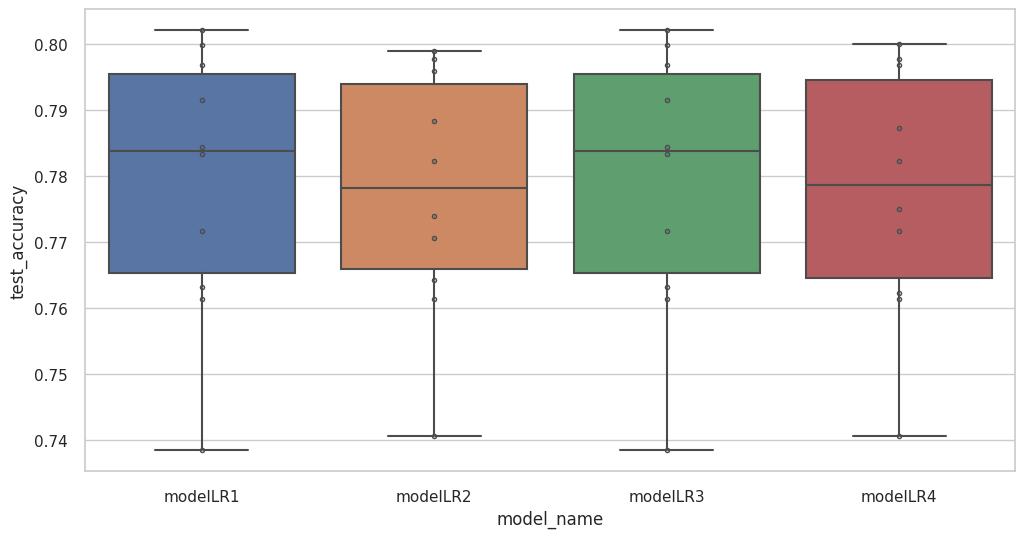

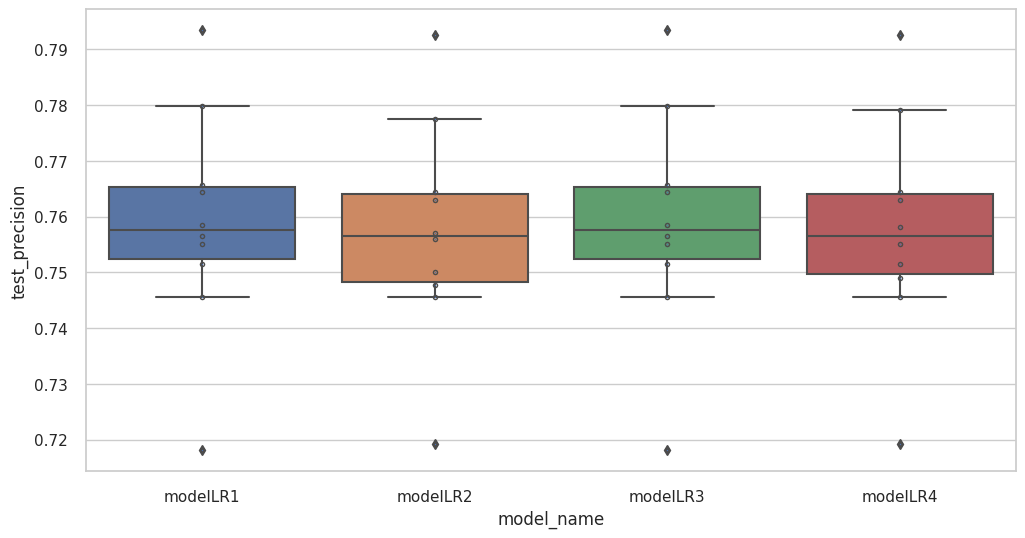

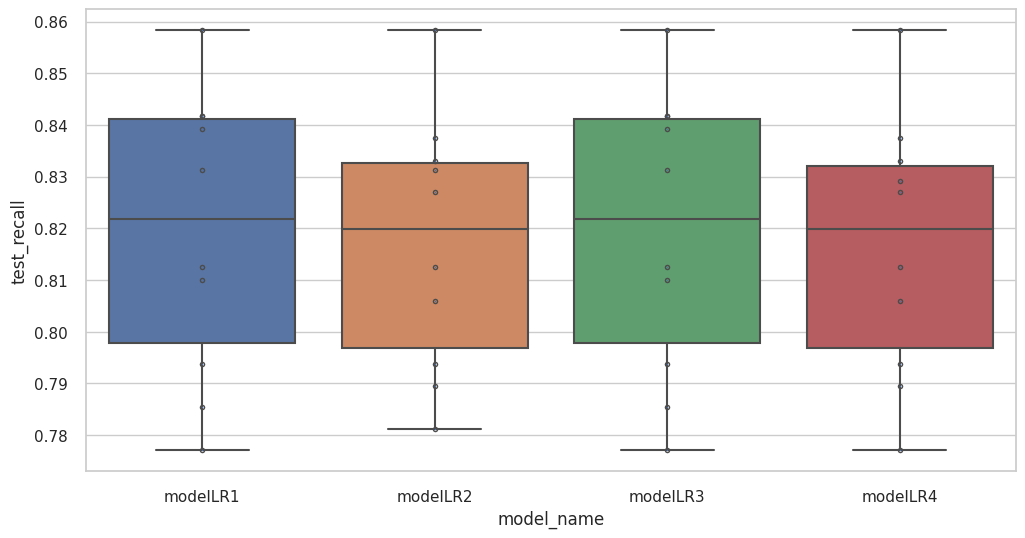

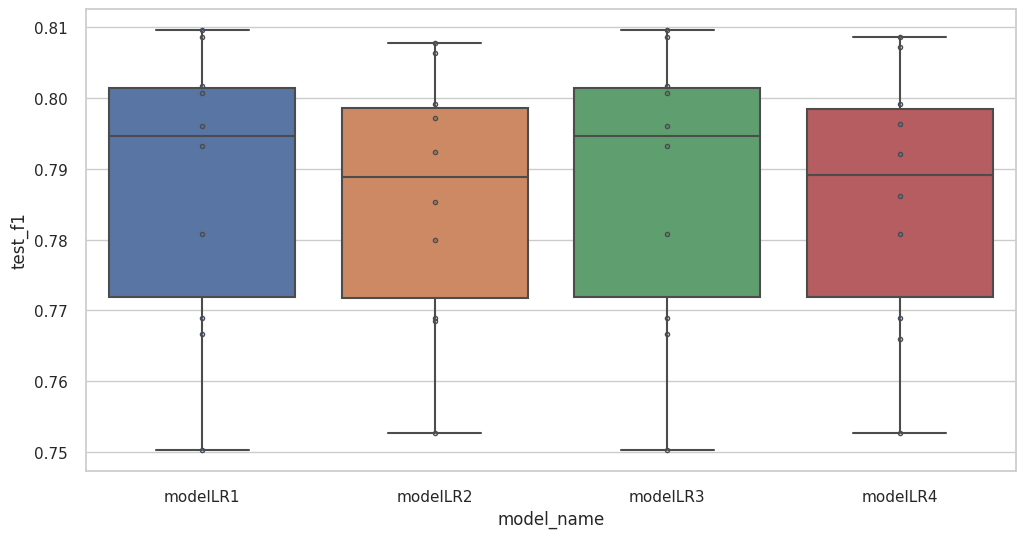

In [ ]:
# Gráfica de las métricas de la regresión logística

for j in cv_LR.columns[1:]:

    fig = plt.figure(figsize=(12,6))

    sns.boxplot(x='model_name', y=j, data=cv_LR)
    sns.stripplot(x='model_name', y=j, data=cv_LR,
                  size=1, jitter=False, edgecolor="gray", linewidth=3)
    plt.show()

In [ ]:
#La media de cada medida por modelo
for j in cv_LR.columns[1:]:
    print(f"\n{j} \n")
    print(cv_LR.groupby('model_name')[j].mean().sort_values(ascending=False))


test_accuracy 

model_name
modelLR1   0.7793
modelLR3   0.7793
modelLR4   0.7775
modelLR2   0.7774
Name: test_accuracy, dtype: float64

test_precision 

model_name
modelLR1   0.7589
modelLR3   0.7589
modelLR4   0.7577
modelLR2   0.7573
Name: test_precision, dtype: float64

test_recall 

model_name
modelLR1   0.8191
modelLR3   0.8191
modelLR2   0.8170
modelLR4   0.8164
Name: test_recall, dtype: float64

test_f1 

model_name
modelLR1   0.7877
modelLR3   0.7877
modelLR2   0.7859
modelLR4   0.7858
Name: test_f1, dtype: float64


Los anteriores datos indican que los modelos 4 (multi_class = "multinomial", solver='lbfgs') y 2 (multi_class = "ovr", solver='liblinear') mejoran levemente los resultados respecto al modelo original, sin embargo, el cambio en estos registros es mínimo.


####Prueba de Regresión Lógistica con hiperparámetros

In [ ]:
# Muestra stroke=0

y_LR1m0=modelLR1.predict(muestra_0.drop("stroke",axis=1))
y_LR2m0=modelLR2.predict(muestra_0.drop("stroke",axis=1))
y_LR3m0=modelLR3.predict(muestra_0.drop("stroke",axis=1))
y_LR4m0=modelLR4.predict(muestra_0.drop("stroke",axis=1))

print("y_LR1m0",100*y_LR1m0.tolist().count(0)/10,"%")
print("y_LR2m0",100*y_LR2m0.tolist().count(0)/10,"%")
print("y_LR3m0",100*y_LR3m0.tolist().count(0)/10,"%")
print("y_LR4m0",100*y_LR4m0.tolist().count(0)/10,"%")


y_LR1m0 80.0 %
y_LR2m0 80.0 %
y_LR3m0 80.0 %
y_LR4m0 80.0 %


In [ ]:
# Muestra stroke=1

y_LR1m1=modelLR1.predict(muestra_1.drop("stroke",axis=1))
y_LR2m1=modelLR2.predict(muestra_1.drop("stroke",axis=1))
y_LR3m1=modelLR3.predict(muestra_1.drop("stroke",axis=1))
y_LR4m1=modelLR4.predict(muestra_1.drop("stroke",axis=1))

print("y_LR1m1",100*y_LR1m1.tolist().count(1)/10,"%")
print("y_LR2m1",100*y_LR2m1.tolist().count(1)/10,"%")
print("y_LR3m1",100*y_LR3m1.tolist().count(1)/10,"%")
print("y_LR4m1",100*y_LR4m1.tolist().count(1)/10,"%")


y_LR1m1 80.0 %
y_LR2m1 80.0 %
y_LR3m1 80.0 %
y_LR4m1 80.0 %


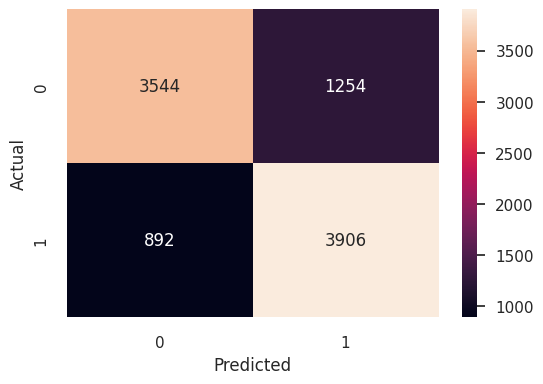

              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77      4798
         1.0       0.76      0.81      0.78      4798

    accuracy                           0.78      9596
   macro avg       0.78      0.78      0.78      9596
weighted avg       0.78      0.78      0.78      9596



In [ ]:
#Creamos matriz de confusión
y_LR1=modelLR4.predict(X)

# Crear matriz de confusión
conf_mat = confusion_matrix(y, y_LR1)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y,y_LR1))

###Random Forest

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RepeatedKFold
from sklearn.inspection import permutation_importance
from sklearn import metrics

Grid Search basado en out-of-bag score

In [ ]:
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:


    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )

    modelo.fit(X_train, y_train)


    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')

<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-122-9b32bd11a6ec>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 9, 'n_estimators': 150} ✓


In [ ]:
resultados.head()

,oob_accuracy,criterion,max_depth,max_features,n_estimators
12,0.9909,entropy,NaN,5,150
21,0.9905,entropy,20.0000,5,150
9,0.9900,gini,20.0000,5,150
0,0.9897,gini,NaN,5,150
10,0.9881,gini,20.0000,7,150


Grid Search basado en validación cruzada

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'precision',
        n_jobs     = - 1,
        refit      = True,
        verbose    = 4,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
0,gini,None,5,150,0.9732,0.0045,1.0000,0.0000
9,gini,20,5,150,0.9727,0.0046,1.0000,0.0000
12,entropy,None,5,150,0.9713,0.0035,1.0000,0.0000
1,gini,None,7,150,0.9710,0.0046,1.0000,0.0000


In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} : 0.9732182733668029 precision


In [ ]:
modelo_final = grid.best_estimator_
modelo_final

RandomForestClassifier(max_features=5, n_estimators=150, random_state=123)

In [ ]:
# Error de test del modelo final
# ==============================================================================
y_pred = modelo_final.predict(X_test)

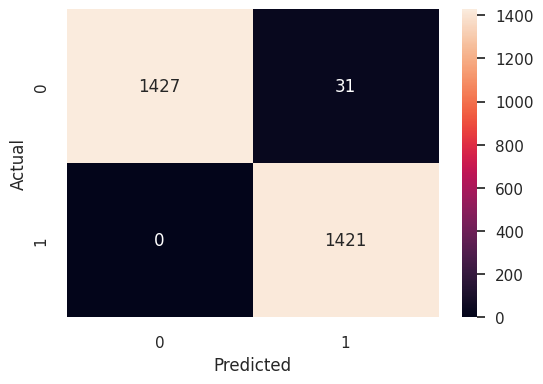

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1458
         1.0       0.98      1.00      0.99      1421

    accuracy                           0.99      2879
   macro avg       0.99      0.99      0.99      2879
weighted avg       0.99      0.99      0.99      2879



In [ ]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

####Prueba de Random Forest con Hiperparámetros

In [ ]:
#Validamos las muestras 0 para el svc
y_modelo_finalm0= modelo_final.predict(muestra_0.drop("stroke",axis=1))
print(y_modelo_finalm0)
print("y_modelo_finalm0",100*y_modelo_finalm0.tolist().count(0)/10,"%")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_modelo_finalm0 100.0 %


In [ ]:
#Validamos las muestras 0 para el svc
y_modelo_finalm1= modelo_final.predict(muestra_0.drop("stroke",axis=1))
print(y_modelo_finalm1)
print("y_modelo_finalm1",100*y_modelo_finalm1.tolist().count(1)/10,"%")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_modelo_finalm1 0.0 %


###SVM

Identificacion del mejor hiperparametro C

In [ ]:
#1 Creacion del modelo
svmL = svm.SVC(kernel='linear', random_state = 0)

# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [ 0.5, 1, 2, 5, 7]}

# definicion de la variable con el número de pliegues
CV = 10

# las metricas sobre las se evaluará el modelo
metricas = 'f1'

# Definimos la busqueda mediante 10-fold CV
busqueda_grid = GridSearchCV(estimator = svmL
                             , param_grid = grid_hiperparametros
                             , cv = CV
                             , scoring = metricas
                             , return_train_score = True
                             , verbose=4)



# Aplicamos la busqueda
busqueda_grid.fit(X, y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END ........C=0.5;, score=(train=0.786, test=0.786) total time=   3.2s
[CV 2/10] END ........C=0.5;, score=(train=0.792, test=0.798) total time=   4.1s
[CV 3/10] END ........C=0.5;, score=(train=0.788, test=0.793) total time=   5.4s
[CV 4/10] END ........C=0.5;, score=(train=0.787, test=0.815) total time=   8.5s
[CV 5/10] END ........C=0.5;, score=(train=0.793, test=0.754) total time=   2.9s
[CV 6/10] END ........C=0.5;, score=(train=0.791, test=0.786) total time=   3.6s
[CV 7/10] END ........C=0.5;, score=(train=0.792, test=0.775) total time=   2.8s
[CV 8/10] END ........C=0.5;, score=(train=0.788, test=0.791) total time=   2.9s
[CV 9/10] END ........C=0.5;, score=(train=0.787, test=0.802) total time=   3.5s
[CV 10/10] END .......C=0.5;, score=(train=0.787, test=0.793) total time=   2.7s
[CV 1/10] END ..........C=1;, score=(train=0.787, test=0.786) total time=   3.2s
[CV 2/10] END ..........C=1;, score=(train=0.788

GridSearchCV(cv=10, estimator=SVC(kernel='linear', random_state=0),
             param_grid={'C': [0.5, 1, 2, 5, 7]}, return_train_score=True,
             scoring='f1', verbose=4)

In [ ]:
#2 Almacenamos en variables los resultados de la busqueda grid
C_cv = busqueda_grid.cv_results_['param_C'].tolist()

f1_medio_cv = busqueda_grid.cv_results_['mean_test_score'].tolist()
f1_std_cv   = busqueda_grid.cv_results_['std_test_score'].tolist()


In [ ]:
#3 Generamos un data frame con los resultados de la validacion cruzada
df_resultados_cv = pd.DataFrame({'C': C_cv,
                                 'mean_test_f1-score': f1_medio_cv,
                                 'std_test_f1-score': f1_std_cv})

print(df_resultados_cv)

# Mejores hiperparametros sobre los datos hold-out
print('Valor de coste y grado óptimos:', busqueda_grid.best_params_)

       C  mean_test_f1-score  std_test_f1-score
0 0.5000              0.7894             0.0155
1 1.0000              0.7890             0.0138
2 2.0000              0.7891             0.0141
3 5.0000              0.7897             0.0143
4 7.0000              0.7895             0.0143
Valor de coste y grado óptimos: {'C': 5}


In [ ]:
#4 Ajustamos el modelo SVM lineal usando el valor de coste óptimo obtenido en cv
modelo_svmL = svm.SVC(kernel='linear',
                      C = busqueda_grid.best_params_.get('C'), #C=5
                      random_state = 0) # semilla

In [ ]:
#5
CV = 10 #Folks:  Pliegues
scoring = 'f1'

entries = []
accuracies = cross_val_score(modelo_svmL, X, y,cv=CV, scoring=scoring)

for fold_idx, accuracy in enumerate(accuracies):
    entries.append(( fold_idx, accuracy))
cv_dfl = pd.DataFrame(entries, columns=['fold_idx', 'f1-Score'])

In [ ]:
#6
print(cv_dfl)
print('f1-Score:', cv_dfl['f1-Score'].mean())

In [ ]:
modelsvmh1 = svm.SVC(kernel='linear', C= 5,  random_state = 0).fit(X, y)
modelsvmh1.fit(X, y)

SVC(C=5, kernel='linear', random_state=0)

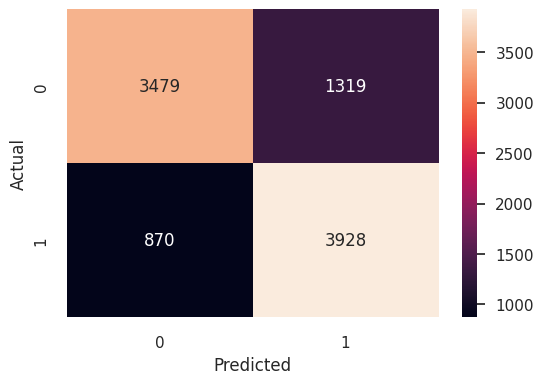

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      4798
         1.0       0.75      0.82      0.78      4798

    accuracy                           0.77      9596
   macro avg       0.77      0.77      0.77      9596
weighted avg       0.77      0.77      0.77      9596



In [ ]:
#Creamos matriz de confusión
y_svh1=modelsvmh1.predict(X)

# Crear matriz de confusión
conf_mat = confusion_matrix(y, y_svh1)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y,y_svh1))

Identificación del mejor hiperparametro C y degree

In [ ]:
#1 Creacion del modelo
svmP = svm.SVC(kernel='poly', random_state = 0)

# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.5, 1, 5, 7, 10],
                        'degree': [2, 3]}

# definicion de la variable con el número de pliegues
CV = 10

# las metricas sobre las se evaluará el modelo
metricas = 'f1'

# Definimos la busqueda mediante 10-fold CV
busqueda_grid = GridSearchCV(estimator = svmP
                             , param_grid = grid_hiperparametros
                             , cv = CV
                             , scoring = metricas
                             , return_train_score = True
                             , verbose=4)


# Aplicamos la busqueda
busqueda_grid.fit(X, y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END C=0.5, degree=2;, score=(train=0.798, test=0.775) total time=   3.2s
[CV 2/10] END C=0.5, degree=2;, score=(train=0.794, test=0.812) total time=   4.7s
[CV 3/10] END C=0.5, degree=2;, score=(train=0.794, test=0.778) total time=   3.1s
[CV 4/10] END C=0.5, degree=2;, score=(train=0.793, test=0.801) total time=   3.1s
[CV 5/10] END C=0.5, degree=2;, score=(train=0.799, test=0.780) total time=   4.6s
[CV 6/10] END C=0.5, degree=2;, score=(train=0.801, test=0.777) total time=   3.1s
[CV 7/10] END C=0.5, degree=2;, score=(train=0.794, test=0.775) total time=   4.9s
[CV 8/10] END C=0.5, degree=2;, score=(train=0.796, test=0.780) total time=   3.1s
[CV 9/10] END C=0.5, degree=2;, score=(train=0.794, test=0.818) total time=   4.4s
[CV 10/10] END C=0.5, degree=2;, score=(train=0.796, test=0.798) total time=   5.8s
[CV 1/10] END C=0.5, degree=3;, score=(train=0.825, test=0.803) total time=   5.7s
[CV 2/10] END C=0.5, de

GridSearchCV(cv=10, estimator=SVC(kernel='poly', random_state=0),
             param_grid={'C': [0.5, 1, 5, 7, 10], 'degree': [2, 3]},
             return_train_score=True, scoring='f1', verbose=4)

In [ ]:
#2 Almacenamos en variables los resultados de la busqueda grid
C_cv = busqueda_grid.cv_results_['param_C'].tolist()
degree_cv = busqueda_grid.cv_results_['param_degree'].tolist()

f1_medio_cv = busqueda_grid.cv_results_['mean_test_score'].tolist()
f1_std_cv = busqueda_grid.cv_results_['std_test_score'].tolist()

In [ ]:
#3 Generamos un data frame con los resultados de la validacion cruzada
df_resultados_cv = pd.DataFrame({'C': C_cv,
                                 'degree': degree_cv,
                                 'mean_test_f1-score': f1_medio_cv,
                                 'std_test_f1-score': f1_std_cv})

print(df_resultados_cv)

# Mejores hiperparametros sobre los datos hold-out
print('Valor de coste y grado óptimos:', busqueda_grid.best_params_)

        C  degree  mean_test_f1-score  std_test_f1-score
0  0.5000       2              0.7896             0.0154
1  0.5000       3              0.8152             0.0107
2  1.0000       2              0.7896             0.0149
3  1.0000       3              0.8240             0.0139
4  5.0000       2              0.7929             0.0137
5  5.0000       3              0.8413             0.0126
6  7.0000       2              0.7932             0.0134
7  7.0000       3              0.8469             0.0120
8 10.0000       2              0.7969             0.0131
9 10.0000       3              0.8502             0.0116
Valor de coste y grado óptimos: {'C': 10, 'degree': 3}


In [ ]:
#4 Ajustamos el modelo SVM lineal usando el valor de coste óptimo obtenido en cv
modelo_svmP = svm.SVC(kernel = 'poly',
                      C = busqueda_grid.best_params_.get('C'), #C=10
                      degree = busqueda_grid.best_params_.get('degree'), #degree=3
                      random_state = 0) # semilla

In [ ]:
#5
CV = 10 #Folks:  Pliegues
scoring = 'f1'


entries = []
accuracies = cross_val_score(modelo_svmP, X, y, cv=CV, scoring=scoring)

for fold_idx, accuracy in enumerate(accuracies):
    entries.append(( fold_idx, accuracy))
cv_dfP = pd.DataFrame(entries, columns=['fold_idx', 'f1-Score'])

In [ ]:
#6
print(cv_dfP)
print('f1-score', cv_dfP['f1-Score'].mean())

   fold_idx  f1-Score
0         0    0.8445
1         1    0.8627
2         2    0.8412
3         3    0.8480
4         4    0.8467
5         5    0.8274
6         6    0.8524
7         7    0.8663
8         8    0.8665
9         9    0.8462
f1-score 0.8501763667850011


In [ ]:
modelsvmh2 = svm.SVC(kernel='poly', C= 10, degree= 3,  random_state = 0).fit(X, y)
modelsvmh2.fit(X, y)

SVC(C=10, kernel='poly', random_state=0)

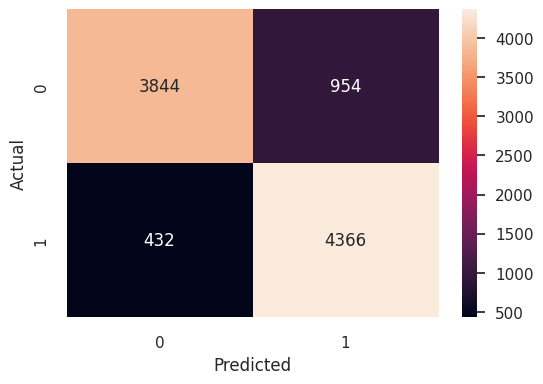

              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85      4798
         1.0       0.82      0.91      0.86      4798

    accuracy                           0.86      9596
   macro avg       0.86      0.86      0.86      9596
weighted avg       0.86      0.86      0.86      9596



In [ ]:
#Creamos matriz de confusión
y_svh2=modelsvmh2.predict(X)

# Crear matriz de confusión
conf_mat = confusion_matrix(y, y_svh2)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y,y_svh2))

 Radial e hiperparámetros: C y gamma (con validación cruzada - Cross validation)

In [ ]:
#1 Creacion del modelo
svmR = svm.SVC(kernel='rbf', random_state = 0)



# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.5, 1, 5, 7, 10],
                        'gamma': [1, 3, 5, 7]}

# definicion de la variable con el número de pliegues
CV = 10

# Definimos las metricas sobre las que queremos evaluar
metricas = 'f1'

# Definimos la busqueda mediante 10-fold CV
busqueda_grid = GridSearchCV(estimator = svmR
                             , param_grid = grid_hiperparametros
                             , cv = CV
                             , scoring = metricas
                             , return_train_score = True
                             , verbose=4)


# Aplicamos la busqueda
busqueda_grid.fit(X, y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10] END C=0.5, gamma=1;, score=(train=0.869, test=0.849) total time=   2.6s
[CV 2/10] END C=0.5, gamma=1;, score=(train=0.863, test=0.853) total time=   4.7s
[CV 3/10] END C=0.5, gamma=1;, score=(train=0.868, test=0.855) total time=   2.6s
[CV 4/10] END C=0.5, gamma=1;, score=(train=0.868, test=0.868) total time=   2.8s
[CV 5/10] END C=0.5, gamma=1;, score=(train=0.874, test=0.854) total time=   2.6s
[CV 6/10] END C=0.5, gamma=1;, score=(train=0.870, test=0.859) total time=   2.6s
[CV 7/10] END C=0.5, gamma=1;, score=(train=0.868, test=0.850) total time=   4.5s
[CV 8/10] END C=0.5, gamma=1;, score=(train=0.868, test=0.876) total time=   2.7s
[CV 9/10] END C=0.5, gamma=1;, score=(train=0.866, test=0.874) total time=   2.7s
[CV 10/10] END C=0.5, gamma=1;, score=(train=0.867, test=0.850) total time=   3.0s
[CV 1/10] END C=0.5, gamma=3;, score=(train=0.892, test=0.874) total time=   2.7s
[CV 2/10] END C=0.5, gamma=3;, sco

In [ ]:
#2 Almacenamos en variables los resultados de la busqueda grid
C_cv = busqueda_grid.cv_results_['param_C'].tolist()
gamma_cv = busqueda_grid.cv_results_['param_gamma'].tolist()

f1_medio_cv = busqueda_grid.cv_results_['mean_test_score'].tolist()
f1_std_cv = busqueda_grid.cv_results_['std_test_score'].tolist()

In [ ]:
#3 Generamos un data frame con los resultados de la validacion cruzada
df_resultados_cv = pd.DataFrame({'C': C_cv,
                                 'gamma': gamma_cv,
                                 'mean_test_f1-score': f1_medio_cv,
                                 'std_test_f1-score': f1_std_cv})

print(df_resultados_cv)

# Mejores hiperparametros sobre los datos hold-out
print('Valor de coste y gamma óptimos:', busqueda_grid.best_params_)

         C  gamma  mean_test_f1-score  std_test_f1-score
0   0.5000      1              0.8548             0.0093
1   0.5000      3              0.8809             0.0110
2   0.5000      5              0.8946             0.0106
3   0.5000      7              0.9055             0.0106
4   1.0000      1              0.8696             0.0105
5   1.0000      3              0.8947             0.0110
6   1.0000      5              0.9075             0.0090
7   1.0000      7              0.9180             0.0095
8   5.0000      1              0.8934             0.0100
9   5.0000      3              0.9194             0.0096
10  5.0000      5              0.9348             0.0067
11  5.0000      7              0.9451             0.0055
12  7.0000      1              0.8975             0.0115
13  7.0000      3              0.9250             0.0098
14  7.0000      5              0.9395             0.0068
15  7.0000      7              0.9488             0.0066
16 10.0000      1              

In [ ]:
#4 Ajustamos el modelo SVM lineal usando el valor de coste óptimo obtenido en cv
modelo_svmR = svm.SVC(kernel = 'rbf',
                      C = busqueda_grid.best_params_.get('C'), #C=1
                      gamma = busqueda_grid.best_params_.get('gamma'), #gamma=3
                      random_state = 0) # semilla

In [ ]:
#5
CV = 10 #Folks:  Pliegues
scoring = 'f1'


entries = []
accuracies = cross_val_score(modelo_svmR, X, y, cv=CV, scoring=scoring)

for fold_idx, accuracy in enumerate(accuracies):
    entries.append(( fold_idx, accuracy))
cv_dfR = pd.DataFrame(entries, columns=['fold_idx', 'f1-Score'])

In [ ]:
#6
print(cv_dfR)
print('f1-score', cv_dfR['f1-Score'].mean())

   fold_idx  f1-Score
0         0    0.9638
1         1    0.9457
2         2    0.9512
3         3    0.9456
4         4    0.9437
5         5    0.9418
6         6    0.9590
7         7    0.9570
8         8    0.9551
9         9    0.9530
f1-score 0.9515908831712079


In [ ]:
modelsvmh3 = svm.SVC(kernel='rbf', C= 10, gamma= 7,  random_state = 0).fit(X, y)
modelsvmh3.fit(X, y)

SVC(C=10, gamma=7, random_state=0)

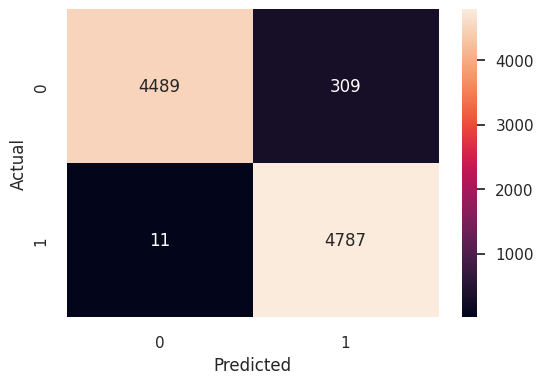

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      4798
         1.0       0.94      1.00      0.97      4798

    accuracy                           0.97      9596
   macro avg       0.97      0.97      0.97      9596
weighted avg       0.97      0.97      0.97      9596



In [ ]:
#Creamos matriz de confusión
y_svh3=modelsvmh3.predict(X)

# Crear matriz de confusión
conf_mat = confusion_matrix(y, y_svh3)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y,y_svh3))

In [ ]:
print('f1-Score')
print('==================================================================')
#print('Lineal                                  :', cv_df['f1-Score'].mean())
print('Lineal e hiperparámetro C               :', cv_dfl['f1-Score'].mean())
print('Polinómico e hiperparámetros: C y degree:', cv_dfP['f1-Score'].mean())
print('Radial e hiperparámetros: C y gamma     :', cv_dfR['f1-Score'].mean())

f1-Score
Lineal e hiperparámetro C               : 0.7790092944978557
Polinómico e hiperparámetros: C y degree: 0.8501763667850011
Radial e hiperparámetros: C y gamma     : 0.9515908831712079


####Prueba de SVM con Hiperparámetros

In [ ]:
modelsvmh1 = svm.SVC(kernel='linear', C= 5,  random_state = 0)
modelsvmh1.fit(X, y)

SVC(C=5, kernel='linear', random_state=0)

In [ ]:
#Validamos las muestras 0 para el svc
y_modelsvmh1m0= modelsvmh1.predict(muestra_0.drop("stroke",axis=1))
print(y_modelsvmh1m0)
print("y_modelsvmh1m0",100*y_modelsvmh1m0.tolist().count(0)/10,"%")

[1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_modelsvmh1m0 80.0 %


In [ ]:
#Validamos las muestras 1 para el svc
y_modelsvmh1m1= modelsvmh1.predict(muestra_1.drop("stroke",axis=1))
print(y_modelsvmh1m1)
print("y_modelsvmh1m1",100*y_modelsvmh1m1.tolist().count(1)/10,"%")

[1. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
y_modelsvmh1m1 80.0 %


In [ ]:
modelo_svmL.fit(X,y)

SVC(C=5, kernel='linear', random_state=0)

In [ ]:
#Validamos las muestras 0 para el svc
y_modelo_svmLm0= modelo_svmL.predict(muestra_0.drop("stroke",axis=1))
print(y_modelo_svmLm0)
print("y_modelo_svmLm0",100*y_modelo_svmLm0.tolist().count(0)/10,"%")

[1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_modelo_svmLm0 80.0 %


In [ ]:
#Validamos las muestras 1 para el svc
y_modelo_svmLm1= modelo_svmL.predict(muestra_1.drop("stroke",axis=1))
print(y_modelo_svmLm1)
print("y_modelo_svmLm1",100*y_modelo_svmLm1.tolist().count(1)/10,"%")

[1. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
y_modelo_svmLm1 80.0 %


In [ ]:
modelsvmh2 = svm.SVC(kernel='poly', C=10 , degree=3 , random_state = 0)
modelsvmh2.fit(X, y)



SVC(C=10, kernel='poly', random_state=0)

In [ ]:
#Validamos las muestras 0 para el svc
y_modelsvmh2m0= modelsvmh2.predict(muestra_0.drop("stroke",axis=1))
print(y_modelsvmh2m0)
print("y_modelsvmh2m0",100*y_modelsvmh2m0.tolist().count(0)/10,"%")

[1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_modelsvmh2m0 80.0 %


In [ ]:
#Validamos las muestras 1 para el svc
y_modelsvmh2m1= modelsvmh2.predict(muestra_1.drop("stroke",axis=1))
print(y_modelsvmh2m1)
print("y_modelsvmh2m1",100*y_modelsvmh2m1.tolist().count(1)/10,"%")

[1. 0. 0. 1. 0. 0. 1. 1. 1. 1.]
y_modelsvmh2m1 60.0 %


In [ ]:
modelo_svmP.fit(X,y)

SVC(C=10, kernel='poly', random_state=0)

In [ ]:
#Validamos las muestras 0 para el svc
y_modelo_svmPm0= modelo_svmP.predict(muestra_0.drop("stroke",axis=1))
print(y_modelo_svmPm0)
print("y_modelo_svmPm0",100*y_modelo_svmPm0.tolist().count(0)/10,"%")

[1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_modelo_svmPm0 80.0 %


In [ ]:
#Validamos las muestras 1 para el svc
y_modelo_svmPm1= modelo_svmP.predict(muestra_1.drop("stroke",axis=1))
print(y_modelo_svmPm1)
print("y_modelo_svmPm1",100*y_modelo_svmPm1.tolist().count(1)/10,"%")

[1. 0. 0. 1. 0. 0. 1. 1. 1. 1.]
y_modelo_svmPm1 60.0 %


In [ ]:
modelsvmh3 = svm.SVC(kernel='rbf', C=10 , gamma=7 , random_state = 0)
modelsvmh3.fit(X, y)

SVC(C=10, gamma=7, random_state=0)

In [ ]:
#Validamos las muestras 0 para el svc
y_modelsvmh3m0= modelsvmh3.predict(muestra_0.drop("stroke",axis=1))
print(y_modelsvmh3m0)
print("y_modelsvmh3m0",100*y_modelsvmh3m0.tolist().count(0)/10,"%")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_modelsvmh3m0 100.0 %


In [ ]:
#Validamos las muestras 1 para el svc
y_modelsvmh3m1= modelsvmh3.predict(muestra_1.drop("stroke",axis=1))
print(y_modelsvmh3m1)
print("y_modelsvmh3m1",100*y_modelsvmh3m1.tolist().count(1)/10,"%")

[1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
y_modelsvmh3m1 20.0 %


In [ ]:
modelo_svmR.fit(X,y)

SVC(C=10, gamma=7, random_state=0)

In [ ]:
#Validamos las muestras 0 para el svc
y_modelo_svmRm0= modelo_svmR.predict(muestra_0.drop("stroke",axis=1))
print(y_modelo_svmRm0)
print("y_modelo_svmRm0",100*y_modelo_svmRm0.tolist().count(0)/10,"%")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_modelo_svmRm0 100.0 %


In [ ]:
#Validamos las muestras 1 para el svc
y_modelo_svmRm1= modelo_svmR.predict(muestra_1.drop("stroke",axis=1))
print(y_modelo_svmRm1)
print("y_modelo_svmRm1",100*y_modelo_svmRm1.tolist().count(1)/10,"%")

[1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
y_modelo_svmRm1 20.0 %


###KNN

In [ ]:
np.random.seed(4)


# Creacion del modelo
knn = KNeighborsClassifier()

#Número de vecinos a evaluar
k=[37, 50, 70, 80, 100]

# definicion de la variable con el número de pliegues
CV = 10

# valor de evaluación (scoring) del modelo
scoring = 'f1' #Otros valores que puede tomar son: accuracy, precision, recall2, f1, roc_auc, balanced_accuracy

# Definición de parámetros
parameters = {'n_neighbors':k, 'metric':['euclidean','manhattan','chebyshev']}

# Creacion de gridSearch con los múltiples parámetros
clf1 = GridSearchCV(estimator=knn
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=True)


clf1.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [37, 50, 70, 80, 100]},
             return_train_score=True, scoring='f1')

In [ ]:
# Obtener los resultados de la búsqueda de la cuadrícula para clf1
results_clf1 = pd.DataFrame(clf1.cv_results_)

# Seleccionar las columnas deseadas
columns_clf1 = ['param_metric', 'param_n_neighbors']  + \
               ['mean_test_score', 'std_test_score']  + \
               [f'split{i}_test_score' for i in range(CV)]

# Filtrar y mostrar los resultados
results_clf1_filtered = results_clf1[columns_clf1]

results_clf1_filtered.sort_values(by='mean_test_score', ascending=False)

,param_metric,param_n_neighbors,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
5,manhattan,37,0.8024,0.0113,0.8178,0.8008,0.7941,0.7911,0.7810,0.8060,0.8147,0.8151,0.8074,0.7958
0,euclidean,37,0.7991,0.0108,0.8113,0.7958,0.7881,0.7859,0.7829,0.8019,0.8129,0.8147,0.8004,0.7973
1,euclidean,50,0.7962,0.0131,0.7992,0.8008,0.7882,0.7922,0.7743,0.7930,0.7985,0.8284,0.7992,0.7886
10,chebyshev,37,0.7918,0.0139,0.7721,0.7796,0.7874,0.7952,0.7738,0.7978,0.7985,0.8188,0.8064,0.7884
6,manhattan,50,0.7912,0.0122,0.8000,0.7996,0.7839,0.7889,0.7726,0.7808,0.7844,0.8183,0.7961,0.7878
7,manhattan,70,0.7877,0.0164,0.7780,0.8074,0.7799,0.7634,0.7644,0.7861,0.7947,0.8171,0.7969,0.7892
11,chebyshev,50,0.7841,0.0107,0.7804,0.7772,0.7801,0.7868,0.7673,0.7778,0.7830,0.8032,0.8036,0.7819
2,euclidean,70,0.7796,0.0119,0.7827,0.7933,0.7662,0.7571,0.7720,0.7783,0.7786,0.8008,0.7845,0.7825
8,manhattan,80,0.7776,0.0115,0.7868,0.7844,0.7754,0.7556,0.7664,0.7798,0.7784,0.8004,0.7705,0.7783
12,chebyshev,70,0.7712,0.0105,0.7714,0.7808,0.7635,0.7453,0.7685,0.7663,0.7798,0.7782,0.7779,0.7803


In [ ]:
# Resultados de clf1
print("Resultados clf1:")
print("Mejor score de validación (", scoring, "):"  ,clf1.best_score_)
print("Mejor conjunto de hiperparámetros:", clf1.best_params_)

Resultados clf1:
Mejor score de validación ( f1 ): 0.8023801663675603
Mejor conjunto de hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 37}


In [ ]:
# Usar los mejores parámetros para ajustar el modelo
knn.set_params(**clf1.best_params_)
knn.fit(X, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=37)

In [ ]:
Knn1=KNeighborsClassifier(metric='manhattan', n_neighbors=37).fit(X, y)

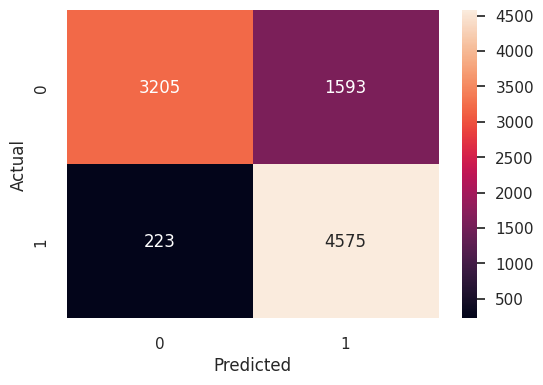

              precision    recall  f1-score   support

         0.0       0.93      0.67      0.78      4798
         1.0       0.74      0.95      0.83      4798

    accuracy                           0.81      9596
   macro avg       0.84      0.81      0.81      9596
weighted avg       0.84      0.81      0.81      9596



In [ ]:
#Creamos matriz de confusión
y_knn1=Knn1.predict(X)

# Crear matriz de confusión
conf_mat = confusion_matrix(y, y_knn1)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y,y_knn1))

####Prueba de KNN con hiperprámetros

In [ ]:
#Validamos las muestras 0 para el random forest
y_knnm0= knn.predict(muestra_0.drop("stroke",axis=1))
print(y_knnm0)
print("y_knnm0",100*y_knnm0.tolist().count(0)/10,"%")

[1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
y_knnm0 70.0 %


In [ ]:
#Validamos las muestras 1 para el random forest
y_knnm1= knn.predict(muestra_1.drop("stroke",axis=1))
print(y_knnm1)
print("y_knnm1",100*y_knnm1.tolist().count(1)/10,"%")

[1. 0. 0. 1. 1. 1. 0. 1. 1. 1.]
y_knnm1 70.0 %


##Prueba de todos los modelos con hiperparámetros

In [ ]:
modelLR2=LogisticRegression(multi_class = "ovr", solver='liblinear',  random_state=0, penalty='l1').fit(X, y)
modelLR3=LogisticRegression(multi_class = "ovr", solver='lbfgs',  random_state=0).fit(X, y)
modelLR4=LogisticRegression(multi_class = "multinomial", solver='lbfgs',  random_state=0).fit(X, y)
modelsvmh1 = svm.SVC(kernel='linear', C= 5,  random_state = 0).fit(X, y)
modelsvmh2 = svm.SVC(kernel='poly', C=10 , degree=3 , random_state = 0).fit(X, y)
modelsvmh3 = svm.SVC(kernel='rbf', C=10 , gamma=7 , random_state = 0).fit(X, y)
Knn1=KNeighborsClassifier(metric='manhattan', n_neighbors=37).fit(X, y)

In [ ]:
modelo_svmL.fit(X,y)
modelo_svmP.fit(X,y)
modelo_svmR.fit(X,y)
knn.fit(X, y)

In [ ]:
# Muestra stroke=0

y_LR2m0=modelLR2.predict(muestra_0.drop("stroke",axis=1))
y_LR3m0=modelLR3.predict(muestra_0.drop("stroke",axis=1))
y_LR4m0=modelLR4.predict(muestra_0.drop("stroke",axis=1))
y_svm1m0=modelsvmh1.predict(muestra_0.drop("stroke",axis=1))
y_svm2m0=modelsvmh2.predict(muestra_0.drop("stroke",axis=1))
y_svm3m0=modelsvmh3.predict(muestra_0.drop("stroke",axis=1))
y_knn1m0=Knn1.predict(muestra_0.drop("stroke",axis=1))

print("y_LR2m0",100*y_LR2m0.tolist().count(0)/10,"%")
print("y_LR3m0",100*y_LR3m0.tolist().count(0)/10,"%")
print("y_LR4m0",100*y_LR4m0.tolist().count(0)/10,"%")
print("y_svm1m0",100*y_svm1m0.tolist().count(0)/10,"%")
print("y_svm2m0",100*y_svm2m0.tolist().count(0)/10,"%")
print("y_svm3m0",100*y_svm3m0.tolist().count(0)/10,"%")
print("y_knn1m0",100*y_knn1m0.tolist().count(0)/10,"%")

y_LR1m0 80.0 %
y_LR2m0 80.0 %
y_LR3m0 80.0 %
y_LR4m0 80.0 %
y_svm1m0 80.0 %
y_svm2m0 80.0 %
y_svm3m0 100.0 %
y_knn1m0 80.0 %


In [ ]:
# Muestra stroke=1

y_LR2m1=modelLR2.predict(muestra_1.drop("stroke",axis=1))
y_LR3m1=modelLR3.predict(muestra_1.drop("stroke",axis=1))
y_LR4m1=modelLR4.predict(muestra_1.drop("stroke",axis=1))
y_svm1m1=modelsvmh1.predict(muestra_1.drop("stroke",axis=1))
y_svm2m1=modelsvmh2.predict(muestra_1.drop("stroke",axis=1))
y_svm3m1=modelsvmh3.predict(muestra_1.drop("stroke",axis=1))
y_knnm1=Knn1.predict(muestra_1.drop("stroke",axis=1))

print("y_LR2m1",100*y_LR2m1.tolist().count(1)/10,"%")
print("y_LR3m1",100*y_LR3m1.tolist().count(1)/10,"%")
print("y_LR4m1",100*y_LR4m1.tolist().count(1)/10,"%")
print("y_svm1m1",100*y_svm1m1.tolist().count(1)/10,"%")
print("y_svm2m1",100*y_svm2m1.tolist().count(1)/10,"%")
print("y_svm3m1",100*y_svm3m1.tolist().count(1)/10,"%")
print("y_knnm1",100*y_knnm1.tolist().count(1)/10,"%")

y_LR1m1 80.0 %
y_LR2m1 80.0 %
y_LR3m1 80.0 %
y_LR4m1 80.0 %
y_svm1m1 80.0 %
y_svm2m1 60.0 %
y_svm3m1 20.0 %
y_knnm1 80.0 %


Según los datos obtenidos, el mejor modelo hasta ahora hablando por la métrica de recall fue el modelo knn con un valor de 0.88 con el modelo inicial (sin hiperparámetros) y usando la validación cruzada se obtiene un valor de 0.947. Cabe mencionar que los árboles de decisiones y el random forest tuvieron métricas muy buenas pero se descartaron por ahora debido a que presentaron un sobreajuste al momento de probar con las 20 muestras removidas de la base de datos.

Finalmente, se evidencia que estos modelos logran identificar correctamente el 80% de los registros tanto positivos como negativos de la variable stroke para la muestra de 20 registros que se sacaron desde un principio.

Para el caso médico, es importante tener en cuenta que por lo general la variable respuesta no va a tener la misma cantidad de datos positivos que negativos, esto debido a su misma naturaleza médica.

Es importante anotar que la clasificación de datos positivos por más precisión que posea el modelo no es una prueba médica que en sí que logre evitar los accidentes cerebrovasculares. Esta predicción lo que puede lograr clasificar es que si presentas las condiciones adecuadas según las variables que poseas y el modelo prediga que puedes sufrir un accidente cerebro vascular es que consultes al personal especializado en el tema y puedas tener un primer acercamiento para evitar una posible complicación médica a futuro.

En cuestiones médicas se considera que sí el modelo es preciso en este caso en un 80% es posible salvar la vida de este porcentaje de personas que presenten las condiciones espécificas que puedan sufrirlo.

De igual manera es importante continuar alimentando la base de datos para obtener resultados más precisos en el futuro.

**Referencias**


*   https://www.who.int/es/news-room/fact-sheets/detail/the-top-10-causes-of-death

*   https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


*   https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/






